## Lập trình xử lý dữ liệu - Nhóm 7: Đánh đâu lỗ đó
### Notebook Xử lý dữ liệu cơ bản
---

## Part 1: Basic filters and statistics

Tuy dữ liệu trước đó đã được làm sạch và đầy vào 2 files CSV là clean_posts.csv và clean_replies.csv, ta vần cần lọc thêm một lần nữa, bao gồm chỉnh sửa đúng kiểu dữ liệu cho các cột, loại bỏ các hàng, các nội dung không cần thiết, lọc đi các kí hiệu lạ gây rối,..

### Task 1: Preparation

#### 1.1: Reading and Filtering Stock Data: Processing CSV Files and Refining Data for Analysis

In [1]:
import pandas as pd
import numpy as np
import json 
from dateutil.parser import isoparser

posts_df = pd.read_csv("cleaned_posts.csv")
replies_df = pd.read_csv('cleaned_replies.csv')


posts_df.head(3)

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols
0,29104030,Vkl luôn,2024-11-06T21:39:23.267+07:00,NaN,0,1,0,NaN,"[{'symb': '^DJI', 'price': 43496.43}]",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06T21:39:05.22+07:00,NaN,0,0,0,NaN,[],Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0
2,29104024,Tăng 1 phát bằng vn làm hai mấy năm :)),2024-11-06T21:39:04.077+07:00,NaN,0,12,2,NaN,"[{'symb': '^DJI', 'price': 43506.86}]",Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,0,1


### 1.2: Data Type Conversion and Data Cleaning for Post Analysis

In [2]:
# Convert data type from 'object' to a Python string
posts_df['taggedSymbols'] = posts_df['taggedSymbols'].astype("string")
posts_df['postID'] = posts_df['postID'].astype('string')
posts_df['originalContent'] = posts_df['originalContent'].astype("string")
posts_df['link'] = posts_df['link'].astype("string")

posts_df['sentiment'] = posts_df['sentiment'].astype('string')
posts_df['sentiment'] = posts_df['sentiment'].map({'1' : 'positive', '0' : 'neutral', '-1' : 'negative'})

posts_df['totalLikes'] = pd.to_numeric(posts_df['totalLikes'], errors='coerce').astype('Int64')
posts_df['totalReplies'] = pd.to_numeric(posts_df['totalReplies'], errors='coerce').astype('Int64')

posts_df['date'] = posts_df['date'].astype("string")
posts_df['date'] = posts_df['date'].apply(lambda x: isoparser().isoparse(x) if pd.notnull(x) else pd.NaT)


posts_df['totalImages'] = pd.to_numeric(posts_df['totalImages'], errors='coerce').astype('Int64')
posts_df['totalSymbols'] = pd.to_numeric(posts_df['totalSymbols'], errors = 'coerce').astype('Int64')

posts_df['replyToPostID'] = posts_df['replyToPostID'].astype("string")
posts_df['username'] = posts_df['username'].astype("string")
posts_df['userid'] = posts_df['userid'].astype('string')

 
# Check the data type
print(posts_df.dtypes)


postID                                    string[python]
originalContent                           string[python]
date               datetime64[ns, tzoffset(None, 25200)]
link                                      string[python]
sentiment                                         object
totalLikes                                         Int64
totalReplies                                       Int64
replyToPostID                             string[python]
taggedSymbols                             string[python]
username                                  string[python]
userid                                    string[python]
totalImages                                        Int64
totalSymbols                                       Int64
dtype: object


Ta thực hiện hóa và chuyển đổi kiểu dữ liệu cho các cột trong dataframe posts_df. 
Các bước xử lý bao gồm: 
1. Chuyển đổi các cột taggedSymbols, postID, originalContent, link, replyToPostID, username, userid, và sentiment sang dạng chuỗi(string)
2. Gắn nhãn cho cột sentiment, các giá trị 1, 0, -1 lần lượt đƯợc thay thế bằng các giá trị 'positive', 'neutral', 'negative' giúp dê đọc và phân tích hơn
3. Các cột totalLikes, totalReplies, totalImages, và totalSymbols được chuyển đổi từ kiểu dữ liệu object ban đầu sang int64. Những dữ liệu không hợp lệ, ví dụ như dữ liệu rỗng, dữ liệu có dạng text, sẽ được sử lý bằng cách gán giá trị NaN(sử dụng tham số errors='coerce').

#### 1.3 Extracting Price and Symbol Information from Tagged Symbols Data

In [3]:
def json_to_dict(x):
    try:
        data = json.loads(x.replace("'", '"'))
        return data
    except json.JSONDecodeError:
        return None
 
posts_df['taggedSymbols'] = posts_df['taggedSymbols'].apply(json_to_dict)  
posts_df = posts_df.explode('taggedSymbols', ignore_index = True)

In [4]:
posts_df['taggedSymbols']

0           {'symb': '^DJI', 'price': 43496.43}
1                                           NaN
2           {'symb': '^DJI', 'price': 43506.86}
3         {'symb': 'VNINDEX', 'price': 1261.28}
4           {'symb': '^DJI', 'price': 43499.54}
                          ...                  
487263           {'symb': 'GVR', 'price': 34.0}
487264          {'symb': 'DIG', 'price': 22.75}
487265          {'symb': 'FPT', 'price': 131.3}
487266           {'symb': 'OIL', 'price': 13.9}
487267           {'symb': 'NKG', 'price': 20.7}
Name: taggedSymbols, Length: 487268, dtype: object

In [5]:
def extract_price(x):
    if isinstance(x, dict) and 'price' in x:
        return x['price']
    return None

posts_df['price'] = posts_df['taggedSymbols'].apply(extract_price)

def extract_symbol(x):
    if isinstance(x, dict) and 'symb' in x:
        return x['symb']
    return None
posts_df['symbol'] = posts_df['taggedSymbols'].apply(extract_symbol)  
posts_df.head(2)   

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,<NA>,neutral,1,0,<NA>,"{'symb': '^DJI', 'price': 43496.43}",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,<NA>,neutral,0,0,<NA>,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None


Riêng cột taggedSymbols ta cần xử lý riêng. Đây là cột chứa thông tin về các mã chứng khoáng và giá của chúng vào thời điểm được nhắc tới, lưu ý rằng mỗi bài viết có thể đề cập tới nhiều mã chứng khoán cùng một lúc. Trước hết ta chuyển đổi dữ liệu dạng chuỗi JSON trong cột thành dictionary Python, thay thế ký tự ' bằng " trước khi chuyển đổi để đảm bảo định dạng JSON hợp lệ. Trả về None nếu dữ liệu không thể chuyển đổi (bắt lỗi JSONDecodeError).Cuối cùng, ta tách từng phần tử trong dictionary của taggedSymbols thành các dòng riêng biệt bằng phương pháp explode, giúp chuẩn hóa dữ liệu khi một bài viết liên quan đến nhiều mã chứng khoán.

Tiếp theo, sau khi đã tách nhiềU mã chứng khoán trong mỗi bài viết thành các hàng riêng biệt, ta sử dụng 2 hàm lần lượt là extract_price, kiểm tra xem giá trị trong cột taggedSymbols có phải là dictionary và chứa khóa price hay không, nếu có, hàm trả về giá trị của khóa price, ngược lại trả về None, và extract_symbol với cú pháp và vai trò tương tự. Từ hai giá trị symbol và price có được ta tách chúng thành 2 cột riêng, để dễ theo dõi và phân tích sau này.


#### 1.4 Handling Missing replyToPostID Values by Mapping Post-Reply Relationships from replies_df

In [6]:
replies_df.head(1)

,postID,originalContent,date,link,sentiment,isTop,isExpertIdea,totalLikes,totalReplies,replyToPostID,referToPostID,taggedSymbols,username,userid,totalImages,totalSymbols
0,29100636,Bác có thể đưa ra kịch bản rằng : Họ sai!\nSố ...,2024-11-06T16:37:32.923+07:00,NaN,0,False,False,1,0,29099549,NaN,[],NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,0,0


In [7]:
#Create the post_reply_dict from replies_df
post_reply_dict = dict(zip(replies_df['postID'], replies_df['replyToPostID']))

# set 'replyToPostID' in posts_df to the value from the dictionary if it exists
posts_df['replyToPostID'] = posts_df['postID'].map(post_reply_dict)

#Increment 'totalReplies' for posts that are being replied to
posts_df.loc[posts_df['replyToPostID'].notna(), 'totalReplies'] += 1

        
posts_df.head(2)

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,<NA>,neutral,1,0,NaN,"{'symb': '^DJI', 'price': 43496.43}",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,<NA>,neutral,0,0,NaN,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None


Ta xử lý cột replyToPostID và totalReplies. Ở trong file clean_posts.csv toàn bộ dữ liệu từ cả hai cột này đều có giá trị rỗng, nguyên nhân là do khi crawl dữ liệu về, các bài bình luận trong một bài viết cũng được coi là một bài viết khác riêng biệt. 

Để khắc phục ta tạo post_reply_dict, một dictionary ánh xạ từ postID sang replyToPostID dựa trên dataframe replies_df. Dictionary này giúp xác định bài viết mà một bài khác đang trả lời.

Tiếp theo, ta gán giá trị replyToPostID trong posts_df bằng cách tra cứu postID thông qua post_reply_dict. Nếu postID tồn tại trong dictionary, giá trị tương ứng sẽ được gán vào cột replyToPostID.

Cuối cùng, ta tăng giá trị của cột totalReplies lên 1 đối với các bài viết có phản hồi (xác định qua replyToPostID khác NaN).










In [8]:
print(replies_df['totalReplies'].unique())
print(replies_df['taggedSymbols'].unique())
print(replies_df['isTop'].unique())
print(replies_df['isExpertIdea'].unique())
print(replies_df['sentiment'].unique())
print(replies_df['totalSymbols'].unique())
print(replies_df['referToPostID'].unique())

print(posts_df['replyToPostID'].unique())


[0]
['[]']
[False]
[False]
[0]
[0]
[nan]
[nan]


#### 1.5: As the data in these columns consists solely of 0, False, NaN, or empty list values, these columns are removed.

In [9]:
replies_df.drop(['totalReplies', 'taggedSymbols', 'isTop', 'isExpertIdea', 'sentiment', 'totalSymbols', 'referToPostID'], axis = 1, inplace = True)
replies_df.head(1)

,postID,originalContent,date,link,totalLikes,replyToPostID,username,userid,totalImages
0,29100636,Bác có thể đưa ra kịch bản rằng : Họ sai!\nSố ...,2024-11-06T16:37:32.923+07:00,NaN,1,29099549,NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,0


Dễ thấy, giá trị trong các totalReplies, taggedSymbols, isTop, isExpertIdea, sentiment, totalSymbols, referToPostID của file clean_replies.csv đều chỉ đúng một giá trị 0, False hoặc NaN, ta thưc hiện loại chúng, do đây là những dữ liệu không cần thiết và không mang giá trị tham khảo

In [10]:
replies_df['postID'] = replies_df['postID'].astype("string")
replies_df['originalContent'] = replies_df['originalContent'].astype("string")
replies_df['link'] = replies_df['link'].astype('string')
replies_df['username'] = replies_df['username'].astype('string')
replies_df['replyToPostID'] = replies_df['replyToPostID'].astype('string')
replies_df['userid'] = replies_df['userid'].astype('string')



replies_df['totalLikes'] = pd.to_numeric(replies_df['totalLikes'], errors = 'coerce').astype("int64")
replies_df['totalLikes'] = pd.to_numeric(replies_df['totalLikes'], errors = 'coerce').astype('int64')


replies_df['date'] = replies_df['date'].astype('string')
replies_df['date'] = replies_df['date'].apply(lambda x : isoparser().isoparse(x) if pd.notnull(x) else pd.NaT)

print(replies_df.dtypes)

postID                                    string[python]
originalContent                           string[python]
date               datetime64[ns, tzoffset(None, 25200)]
link                                      string[python]
totalLikes                                         int64
replyToPostID                             string[python]
username                                  string[python]
userid                                    string[python]
totalImages                                        int64
dtype: object


---
### Task 2: Perform Basic Statistics and Visualizations

Ta thực hiện các thống kê cơ bản, kết hợp với trực quan hoá dữ liệu sử dụng các loại biểu đò. 
Cần lưu ý rằng, những thông tin được đưa ra trong phần chủ yếu mang tính tham khảo, do đó giá trị thực tiễn sẽ không cao.

#### 2.1: Ranking symbols based on Statistics on the Number of Positive, Negative, and Neutral Posts mentioning them

In [11]:
stock_symbols_analysis = posts_df.groupby('symbol').agg(
    TotalPosts = ('postID', 'count'),
    NumberOFPositivePosts = ('sentiment', lambda x : (x == 'positive').sum()),
    NumberOFNegativePosts = ("sentiment", lambda x : (x == 'negative').sum()),
    NumberOfNeutralPosts = ('sentiment', lambda x : (x == 'neutral').sum()),
).reset_index()


    
stock_symbols_analysis['PositiveRatio'] = stock_symbols_analysis['NumberOFPositivePosts'] / stock_symbols_analysis['NumberOFNegativePosts']
stock_symbols_analysis['PositiveRatio'] = stock_symbols_analysis['PositiveRatio'].replace([np.inf, -np.inf, np.nan], 0)
stock_symbols_analysis = stock_symbols_analysis.round(2)

average_total_posts = round(stock_symbols_analysis['TotalPosts'].mean(), 2)
average_total_positive_posts = round(stock_symbols_analysis['NumberOFPositivePosts'].mean(), 2)
average_total_negative_posts = round(stock_symbols_analysis['NumberOFNegativePosts'].mean(), 2)
average_positive_ratio = round(stock_symbols_analysis['PositiveRatio'].mean(), 2)


# Print all the average values
print(f"Average Total Posts: {average_total_posts}")
print(f"Average Total Positive Posts: {average_total_positive_posts}")
print(f"Average Total Negative Posts: {average_total_negative_posts}")
print(f"Average Positive Ratio: {average_positive_ratio}")

stock_symbols_analysis.sort_values(['NumberOFPositivePosts', 'NumberOFNegativePosts', 'PositiveRatio'], ascending = [False, False ,False]).head(10)



Average Total Posts: 324.28
Average Total Positive Posts: 61.17
Average Total Negative Posts: 15.59
Average Positive Ratio: 1.52


,symbol,TotalPosts,NumberOFPositivePosts,NumberOFNegativePosts,NumberOfNeutralPosts,PositiveRatio
1382,VNINDEX,55258,8919,3518,42821,2.54
624,HPG,13317,3204,582,9531,5.51
461,DXG,10721,2355,478,7888,4.93
771,MBB,7125,2279,322,4524,7.08
571,HCM,7433,2239,288,4906,7.77
1369,VN30F1M,11448,2236,661,8551,3.38
1368,VN30,7537,2211,433,4893,5.11
1154,STB,7028,2124,290,4614,7.32
914,PDR,8325,2020,390,5915,5.18
1150,SSI,7911,1967,488,5456,4.03


Đoạn mã trên thực hiện phân tích dữ liệu dựa trên số lượng bài viết và cảm xúc liên quan đến từng mã chứng khoán trong cột symbol. Cụ thể:
Tổng số bài viết (TotalPosts) được tính bằng cách đếm số lượng giá trị trong cột postID

Số bài viết tích cực (NumberOFPositivePosts), tiêu cực (NumberOFNegativePosts), và trung tính (NumberOfNeutralPosts) được tính bằng cách đếm số giá trị tương ứng với 'positive', 'negative', và 'neutral' trong cột sentiment.

Ngoài ra ta cũng thêm cột PositiveRatio, tính tỉ lệ số bài đang tiêu cực với tiêu cực, để dẽ theo dõi xem, liệu mã chứng khoán nào đang nhận được nhiều sự yêu thích hay thường xuyên bị công kích,..


In [12]:
popular_brand_list = stock_symbols_analysis.loc[stock_symbols_analysis['TotalPosts'] > 3000]['symbol']
popular_brand_list = popular_brand_list.tolist()
print(popular_brand_list)

['$BTC', 'ACB', 'BSR', 'CEO', 'CTG', 'DBC', 'DCM', 'DIG', 'DXG', 'EIB', 'FPT', 'FTS', 'HCM', 'HPG', 'HSG', 'MBB', 'MBS', 'MSB', 'MSN', 'MWG', 'NKG', 'NVL', 'PDR', 'SHB', 'SSI', 'STB', 'TCB', 'TCH', 'TPB', 'VCI', 'VHM', 'VIC', 'VIX', 'VN30', 'VN30F1M', 'VND', 'VNINDEX', 'VPB', 'VRE', '^DJI']


#### 2.3 VNIDEX analysis

Mã chứng khoán VNINDEX nhận được sự quan tâm đặc biệt không chỉ trong bài phân tích hiện tại mà còn trong nhiều nghiên cứu sau này. Lý do quan trọng nhất chính là mức độ phổ biến của nó trong các bài đăng. Tổng cộng, đã có hơn 55.000 bài viết đề cập đến mã chứng khoán này, một con số vượt trội so với nhiều mã khác.

Số lượng lớn bài viết, bao gồm cả bài đăng mang tính tích cực lẫn tiêu cực, tạo ra nguồn dữ liệu phong phú, giúp cải thiện độ chính xác của các tính toán xác suất và phân tích dự đoán trong tương lai.

Mặc dù nhận được nhiều sự chú ý là vậy, giá cổ phiếu VNINDEX lại thường xuyên biến động mạnh và bất thường. Điều này  đặt ra rất nhiều thách thức lớn nhưng cũng đồng thời mang lại cơ hội để kiểm chứng tính hiệu quả của các mô-đun phân tích và mô hình dự đoán mà nhóm đang phát triển.

In [13]:
VNINDEX_df = posts_df.loc[posts_df['symbol'] == 'VNINDEX']
VNINDEX_df = VNINDEX_df.sort_values(by = 'date', ascending = True)
VNINDEX_df['date'] = VNINDEX_df['date'].dt.date
VNINDEX_df.head(2)


,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol
487246,28008039,Toàn hàng ngon mà bỏ lỡ nhỉ,2024-09-06,<NA>,neutral,0,2,NaN,"{'symb': 'VNINDEX', 'price': 1268.51}",Slang High,6727b9f2-e137-43e6-9b50-f73d585b4463,0,3,1268.51,VNINDEX
487241,28008058,Tiền đi đâu hết rồi. Thanh khoản yếu thế này c...,2024-09-06,<NA>,negative,0,0,NaN,"{'symb': 'VNINDEX', 'price': 1268.58}",Hành Trình Về Bờ 🧑🏻‍🎤,8afad925-61c1-4ee3-8aa0-1890ad019fbe,0,1,1268.58,VNINDEX


Ta thực hiện phân tích dữ liệu liên quan đến mã chứng khoán VNINDEX theo ngày. Cụ thể:

Lọc dữ liệu:

Trích xuất các bài viết có mã chứng khoán là VNINDEX từ dataframe posts_df.
Sắp xếp và chuẩn hóa ngày:

Sắp xếp dữ liệu theo cột date tăng dần và chuyển đổi cột date sang định dạng chỉ chứa ngày.
Nhóm dữ liệu theo ngày (date):

Số lượng bài viết: Tổng số bài đăng trong ngày (NumberOfPosts).
Số bài viết tiêu cực: Đếm các bài viết có cảm xúc là negative.
Số bài viết tích cực: Đếm các bài viết có cảm xúc là positive.
Giá trung bình: Tính giá trung bình của cổ phiếu (price) trong ngày.
Kết quả:

Kết quả được lưu vào dataframe VNINDEX_analyse, với 4 cột chính là NumberOfPosts, NumberOfNegativePosts, NumberOfPositivePosts, và price.

#### 2.4 Aggregating Posts and Price Data for VNINDEX by Date

In [14]:
VNINDEX_analyse = VNINDEX_df.groupby(['date']).agg(
    NumberOfPosts=('postID', 'count'),
    NumberOfNegativePosts=('sentiment', lambda x: (x == 'negative').sum()),
    NumberOfPositivePosts=('sentiment', lambda x: (x == 'positive').sum()),
    price=('price', 'mean')  # Aggregation function for 'price'
).reset_index()

# Display the result
VNINDEX_analyse.head(20)


,date,NumberOfPosts,NumberOfNegativePosts,NumberOfPositivePosts,price
0,2024-09-06,707,48,80,1268.913918
1,2024-09-07,113,6,24,1273.960000
2,2024-09-08,120,6,29,1273.695417
3,2024-09-09,891,51,148,1268.054759
4,2024-09-10,1203,83,144,1260.192934
5,2024-09-11,1131,94,140,1251.090840
6,2024-09-12,953,66,159,1257.005960
7,2024-09-13,1028,52,158,1251.985525
8,2024-09-14,94,2,19,1251.710000
9,2024-09-15,150,7,37,1251.969267


Dễ dàng nhận thấy, số lượng bài viết đề cập đến VNINDEX có sự dao động mạnh mẽ, phản ánh biến động của giá cổ phiếu. Khi giá cổ phiếu biến động đáng kể, số lượng bài viết tăng cao; ngược lại, khi giá duy trì ở mức ổn định, số lượng bài viết giảm đáng kể.

Ví dụ, từ ngày 08/09/2024 đến ngày 10/09/2024, giá cổ phiếu VNINDEX giảm sâu từ 1273 xuống còn 1260, kéo theo tổng số bài viết tăng mạnh từ 120 lên 891, sau đó đạt đỉnh ở mức 1203 bài. Đồng thời, số lượng bài viết tích cực và tiêu cực cũng tăng đáng kể, phản ánh sự quan tâm gia tăng của cộng đồng.

Ngược lại, trong hai ngày 14/09 và 15/09, khi giá VNINDEX ổn định quanh mức 1251, số lượng bài viết trung bình chỉ hơn 100 bài, số bài viết tích cực lẫn tiêu cực đều thấp.

Điều này hoàn toàn dễ hiểu và phù hợp với quy luật tâm lý thị trường: khi giá cổ phiếu biến động mạnh, sự chú ý và thảo luận của nhà đầu tư sẽ tăng cao, trong khi giá ổn định thường không tạo ra nhiều sự quan tâm.








#### 2.5 Visualization of VNINDEX Data

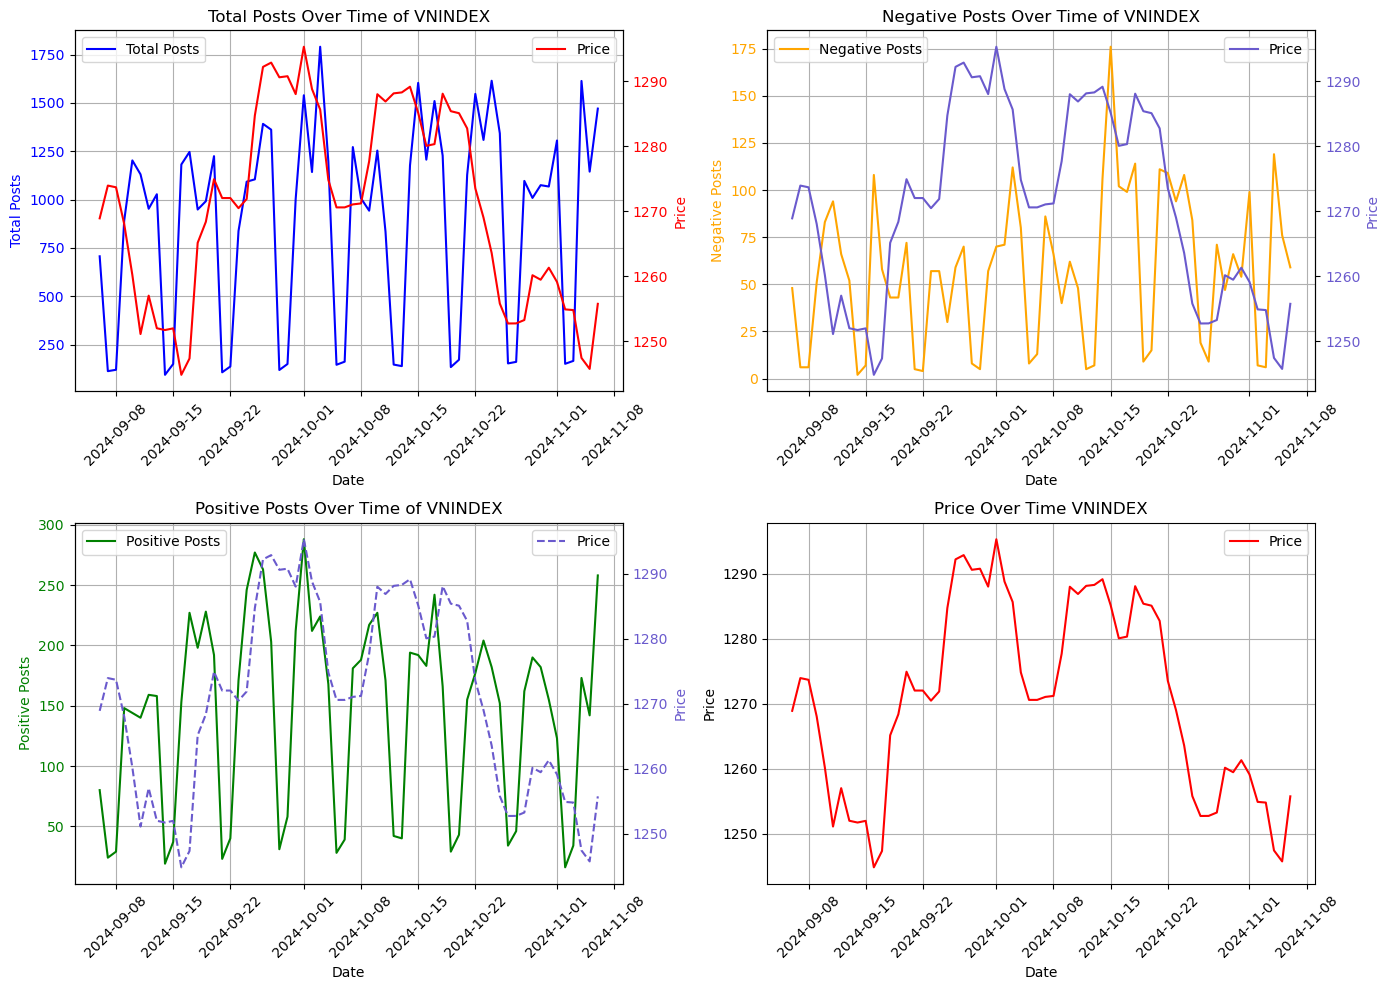

In [15]:
import matplotlib.pyplot as plt

# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# First subplot: Total Posts with Price
ax1 = axes[0, 0]
ax1.plot(VNINDEX_analyse['date'], VNINDEX_analyse['NumberOfPosts'], label='Total Posts', color='blue')
ax1.set_title("Total Posts Over Time of VNINDEX")
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Posts', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# Add the price line with a secondary y-axis
ax1_price = ax1.twinx()
ax1_price.plot(VNINDEX_analyse['date'], VNINDEX_analyse['price'], label='Price', color='Red')
ax1_price.set_ylabel('Price', color='Red')
ax1_price.tick_params(axis='y', labelcolor='Red')
ax1.legend(loc='upper left')
ax1_price.legend(loc='upper right')

# Second subplot: Negative Posts with Price
ax2 = axes[0, 1]
ax2.plot(VNINDEX_analyse['date'], VNINDEX_analyse['NumberOfNegativePosts'], label='Negative Posts', color='orange')
ax2.set_title("Negative Posts Over Time of VNINDEX")
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Posts', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True)

# Add the price line with a secondary y-axis
ax2_price = ax2.twinx()
ax2_price.plot(VNINDEX_analyse['date'], VNINDEX_analyse['price'], label='Price', color='Slateblue')
ax2_price.set_ylabel('Price', color='Slateblue')
ax2_price.tick_params(axis='y', labelcolor='Slateblue')
ax2.legend(loc='upper left')
ax2_price.legend(loc='upper right')

# Third subplot: Positive Posts with Price
ax3 = axes[1, 0]
ax3.plot(VNINDEX_analyse['date'], VNINDEX_analyse['NumberOfPositivePosts'], label='Positive Posts', color='green')
ax3.set_title("Positive Posts Over Time of VNINDEX")
ax3.set_xlabel('Date')
ax3.set_ylabel('Positive Posts', color='green')
ax3.tick_params(axis='y', labelcolor='green')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True)

# Add the price line with a secondary y-axis
ax3_price = ax3.twinx()
ax3_price.plot(VNINDEX_analyse['date'], VNINDEX_analyse['price'], label='Price', color='Slateblue', linestyle='--')
ax3_price.set_ylabel('Price', color='Slateblue')
ax3_price.tick_params(axis='y', labelcolor='Slateblue')
ax3.legend(loc='upper left')
ax3_price.legend(loc='upper right')

# Fourth subplot: Keep unchanged
axes[1, 1].plot(VNINDEX_analyse['date'], VNINDEX_analyse['price'], label='Price', color='red')
axes[1, 1].set_title("Price Over Time VNINDEX")
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Price')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Để chứng minh và mô tả rõ hơn nhận định phía trên, ta xây dựng 4 biểU đồ thể hiện mối tương quan giữa số lượng bài viết nói chung, số lượng bài viết tích cực, và số lượng bài viết tiêu cực vơí giá trị cổ phiếu của VNINDEX qua thời gian.

Nhìn chung sự tương quan giữa các bài viết vớI biến động giá cổ phiểu được thể hiện khá rõ ràng

Khi giá giảm, số bài viết tiêu cực tăng; ngược lại, khi giá tăng, có nhiều bài viết tích cực xuất hiện. Điều này phản ánh tâm lý của cộng đồng nhà đầu tư trước các diễn biến của thị trường.

Biểu đồ cung cấp góc nhìn trực quan về sự tương quan giữa tin tức và biến động giá, giúp đánh giá mức độ nhạy cảm của nhà đầu tư đối với VNINDEX.

In [16]:
import seaborn as sns
# Calculate the average and standard deviation of the VNINDEX price
average_vnindex_price = VNINDEX_analyse['price'].mean()
standard_price_deviation = VNINDEX_analyse['price'].std()

# Calculate the correlation between different post categories and the price
correlation_positive_price = (VNINDEX_analyse['NumberOfPositivePosts'] / VNINDEX_analyse['NumberOfPosts']).corr(VNINDEX_analyse['price'])
correlation_negative_price = (VNINDEX_analyse['NumberOfNegativePosts'] / VNINDEX_analyse['NumberOfPosts']).corr(VNINDEX_analyse['price'])
correlation_posts_price = (VNINDEX_analyse['NumberOfPosts']).corr(VNINDEX_analyse['price'])

# Calculate percentage change for posts and price
VNINDEX_analyse['posts_pct_change'] = VNINDEX_analyse['NumberOfPosts'].pct_change() 
VNINDEX_analyse['price_pct_change'] = VNINDEX_analyse['price'].pct_change() * 100


# Calculate correlation between percentage change in posts and price
correlation_pct_change = VNINDEX_analyse['posts_pct_change'].corr(VNINDEX_analyse['price_pct_change'])

# Print the results with formatting
print(f"Average VNINDEX Price: {average_vnindex_price:.2f}")
print(f"Standard Deviation of Price: {standard_price_deviation:.2f}")
print(f"Correlation between Positive Posts and Price: {correlation_positive_price:.2f}")
print(f"Correlation between Negative Posts and Price: {correlation_negative_price:.2f}")
print(f"Correlation between the Number of Posts and Price: {correlation_posts_price:.2f}")
print(f"Correlation between Percentage Change of Posts and Price: {correlation_pct_change:.2f}")



Average VNINDEX Price: 1270.77
Standard Deviation of Price: 14.54
Correlation between Positive Posts and Price: 0.31
Correlation between Negative Posts and Price: -0.02
Correlation between the Number of Posts and Price: 0.03
Correlation between Percentage Change of Posts and Price: -0.18


Đoạn mã trên thực hiện các phân tích thống kê để đánh giá mối quan hệ giữa số lượng bài viết (và các loại bài viết) với giá VNINDEX. Cụ thể:
Ta sử dụng .mean() để tính giá trung bình của VNINDEX, sử dụng .std() để tính độ lệch chuẩn, biểu thị mức độ dao động của giá so với giá trị trung bình.
Việc tính toán các giá trị trên giúp ta hiểu rõ các đặc điểm phân phối giá VNINDEX trong từng giai đoạn phân tích.

Bên cạnh đó, ta cũng tính toán hệ số tương quan giữa số lượng bài viết nói chung, bài viết tích cực, bài viết tiêu cực với giá VNINDEX. 
Từ đó, nhận diện mối quan hệ tuyến tính giữa các loại bài viết và giá trị cổ phiếu.

Kết quả được in ra cho thấy:
Giá trị trung bình của VNINDEX là 1270.77, với độ lệch chuẩn 14.54. Tuy giá trị độ lệch chuẩn chỉ là 14.54 rất nhỏ so với giá trị trung bình của cổ phiếu, trong phạm vi đầu từ chứng khoán, nó có ảnh rất đáng kể lên thị trường, đặc biệt đối với các nhà đầu tư chứng khoán.

Hệ số tương quan giữa số lượng bài đăng tích cực, số lượng bài đăng tiêu cực và số lượng bài đăng nói chung với giá trị cổ phiểu VNINDEX nhìn chung đều rất thấp, lần lượt là 0.31, -0.02, 0.03. Điều này dường như trái với nhận định phía trên rằng sự tương quan giữa các bài viết vớI biến động giá cổ phiểu được thể hiện rõ ràng. Tuy vậy, số lượng các bài đăng ảnh hưởng nhiềU từ biến động giá cả nói chung chứ không chỉ tăng hay giảm, Do đó để thấy được mối tương quan rõ ràng hơn ta cần có những tính toán và cách tiếp cận khác như sử dụng mô hình phân tích phi tuyến tính, kiểm tra độ trễ (lag) giữa bài viết và giá, hoặc phân nhóm dữ liệu để tìm các xu hướng cụ thể trong từng giai đoạn thị trường..


#### 2.6: Visualization the correlation of Percentage Change in Price vs Number of Posts

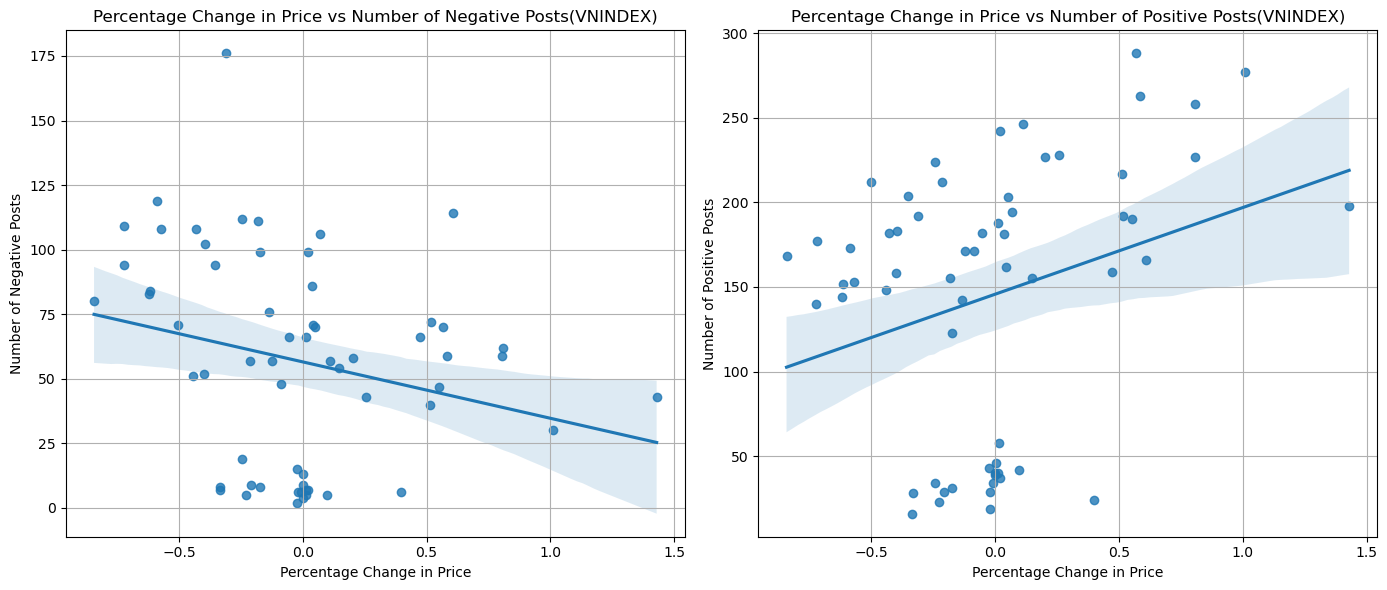

In [17]:
import seaborn as sns

# Set up a 1x2 grid for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Number of Negative Posts
sns.regplot(x='price_pct_change', y='NumberOfNegativePosts', data=VNINDEX_analyse, ax=axes[0])
axes[0].set_title('Percentage Change in Price vs Number of Negative Posts(VNINDEX)')
axes[0].set_xlabel('Percentage Change in Price')
axes[0].set_ylabel('Number of Negative Posts')
axes[0].grid(True)

# Plot for Number of Positive Posts
sns.regplot(x='price_pct_change', y='NumberOfPositivePosts', data=VNINDEX_analyse, ax=axes[1])
axes[1].set_title('Percentage Change in Price vs Number of Positive Posts(VNINDEX)')
axes[1].set_xlabel('Percentage Change in Price')
axes[1].set_ylabel('Number of Positive Posts')
axes[1].grid(True)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()
plt.show()

Như đã đề cập ở trên, mối quan hệ giữa giá trị cổ phiếu và số lượng bài viết có thể được thể hiện rõ ràng hơn khi sử dụng một cách tiếp cận khác. Trong phân tích này, chúng ta áp dụng biểu đồ hồi quy (sns.regplot) để trực quan hóa mối quan hệ giữa hai biến, bao gồm đường hồi quy tuyến tính và các điểm dữ liệu thực tế.

Dữ liệu sử dụng để phân tích tương quan là tỷ lệ phần trăm biến động giá VNINDEX (price_pct_change) thay vì giá trị tuyệt đối của VNINDEX (price) như trong các phân tích trước, kết hợp với số lượng bài viết tích cực và tiêu cực.

Kết quả từ hai biểu đồ cho thấy một xu hướng rõ ràng: đường hồi quy cho số lượng bài viết tiêu cực có độ dốc đi xuống, phản ánh mối quan hệ nghịch giữa giá VNINDEX và số lượng bài viết tiêu cực. Ngược lại, đường hồi quy cho số lượng bài viết tích cực có độ dốc đi lên, cho thấy mối quan hệ thuận giữa giá VNINDEX và số lượng bài viết tích cực. Những xu hướng này được thể hiện một cách trực quan và rõ nét qua biểu đồ.



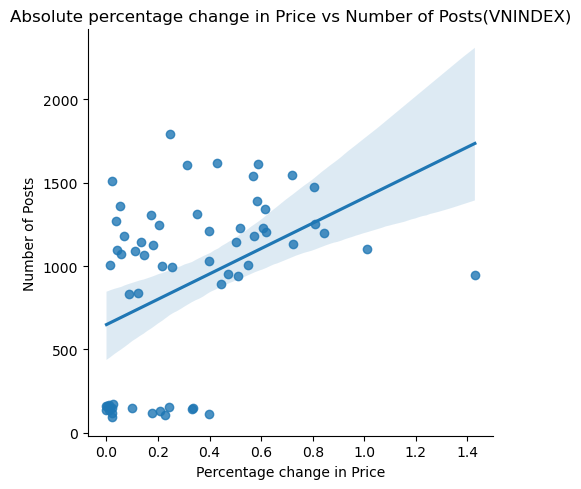

In [18]:
VNINDEX_analyse['price_pct_change'] = abs(VNINDEX_analyse['price_pct_change'])
sns.lmplot(x = 'price_pct_change', y = 'NumberOfPosts', data = VNINDEX_analyse)
plt.title('Absolute percentage change in Price vs Number of Posts(VNINDEX)')
plt.xlabel('Percentage change in Price')
plt.ylabel('Number of Posts')

plt.grid(True)
plt.tight_layout()
plt.show()

Trong tính toán trước đó, hệ số tương quan giữa số lượng bài đăng với phần trăm thay đổi giá trị cổ phiểU gần như chỉ bằng 0(0.03). 

Tuy vậy, sau khi thực hiện phép biến đổi VNINDEX_analyse['price_pct_change'] = abs(VNINDEX_analyse['price_pct_change']), sự tương quan giữa số lượng bài viết và giá trị cổ phiếu lại trở nên vô cùng mạnh mẽ, với đường thằng hồi quy có độ dốc lên trên cao. 

Như vậy, đúng như dự đoán và giải thích, số lượng bài viết tăng cao khi giá cả có sự biến động, bất kể là giảm hay tăng

In [19]:
VNINDEX_analyse['price_change'] = VNINDEX_analyse['price'].diff()
correlation_price_change_posts = VNINDEX_analyse['price_change'].abs().corr(VNINDEX_analyse['NumberOfPosts'])
correlation_price_change_negative_posts = VNINDEX_analyse['price_change'].corr(VNINDEX_analyse['NumberOfNegativePosts'])
correlation_price_change_positive_posts = VNINDEX_analyse['price_change'].corr(VNINDEX_analyse['NumberOfPositivePosts'])

print(f"Correlation between Price Change and Number of Posts(VNINDEX): {correlation_price_change_posts:.2f}")
print(f"Correlation between Price Change and Number of Negative Posts(VNINDEX): {correlation_price_change_negative_posts:.2f}")
print(f"Correlation between Price Change and Number of Positive Posts(VNINDEX): {correlation_price_change_positive_posts:.2f}")

Correlation between Price Change and Number of Posts(VNINDEX): 0.43
Correlation between Price Change and Number of Negative Posts(VNINDEX): -0.24
Correlation between Price Change and Number of Positive Posts(VNINDEX): 0.28


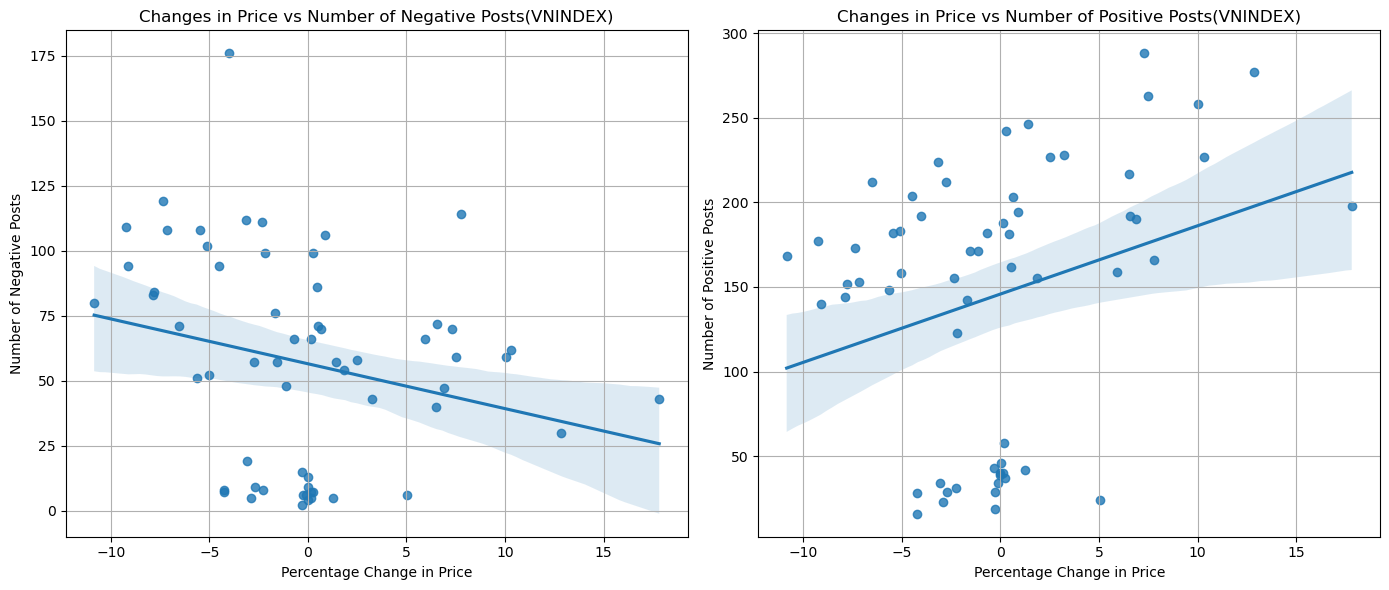

In [20]:
# Set up a 1x2 grid for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.regplot(x='price_change', y='NumberOfNegativePosts', data=VNINDEX_analyse, ax=axes[0])
axes[0].set_title('Changes in Price vs Number of Negative Posts(VNINDEX)')
axes[0].set_xlabel('Percentage Change in Price')
axes[0].set_ylabel('Number of Negative Posts')
axes[0].grid(True)


sns.regplot(x='price_change', y='NumberOfPositivePosts', data=VNINDEX_analyse, ax=axes[1])
axes[1].set_title('Changes in Price vs Number of Positive Posts(VNINDEX)')
axes[1].set_xlabel('Percentage Change in Price')
axes[1].set_ylabel('Number of Positive Posts')
axes[1].grid(True)


plt.tight_layout()
plt.show()

#### 2.7: Categorizing Days Based on Price Change and Analyzing Post Data

#### Đoạn mã trên giúp phân loại các ngày theo mức độ biến động giá của VNINDEX đồng thời tính toán số lượng bài viết trung bình (bao gồm bài viết tích cực và tiêu cực) cho từng nhóm. Cụ thể:

#### Ngày Stable: Giá thay đổi ít hơn 0.25%, tức là thay đổi nhỏ hoặc không có thay đổi đáng kể.

Ngày Slight Change: Biến động giá trong khoảng từ 0.25% đến 2%.

Ngày Significant Increase: Biến động giá lớn hơn 4% (giá tăng mạnh).

Ngày Significant Decrease: Biến động giá nhỏ hơn -4% (giá giảm mạnh).


#### Tính toán số lượng bài viết trung bình cho từng loại ngày:

Số lượng bài viết tổng cộng (Average Number of Posts)

Số lượng bài viết tích cực (Average Number of Positive Posts)

Số lượng bài viết tiêu cực (Average Number of Negative Posts)

Kết quả của đoạn mã trên sẽ in ra số lượng bài viết trung bình cho từng nhóm biến động giá, giúp bạn hiểu rõ hơn về mối quan hệ giữa sự thay đổi giá và số lượng bài viết trên thị trường.


In [21]:
# Define thresholds
stability_threshold = 0.25  # Stable days with minimal change
slight_change_threshold = 2  # Slight change days

# Categorize days based on price change
VNINDEX_analyse['price_category'] = 'Stable'
VNINDEX_analyse.loc[(VNINDEX_analyse['price_change'] > stability_threshold) & 
                    (VNINDEX_analyse['price_change'] <= slight_change_threshold), 'price_category'] = 'Slight Change'
VNINDEX_analyse.loc[VNINDEX_analyse['price_change'] > 4, 'price_category'] = 'Significant Increase'
VNINDEX_analyse.loc[VNINDEX_analyse['price_change'] < -4, 'price_category'] = 'Significant Decrease'

# Calculate average number of posts for each category
avg_posts = VNINDEX_analyse.groupby('price_category')['NumberOfPosts'].mean()
avg_positive_posts = VNINDEX_analyse.groupby('price_category')['NumberOfPositivePosts'].mean()
avg_negative_posts = VNINDEX_analyse.groupby('price_category')['NumberOfNegativePosts'].mean()

# Print the results
print("\nAverage Number of Posts by Price Category:")
for category in avg_posts.index:  # Loop only through existing categories
    print(f"{category} Days:")
    print(f"  - Average Number of Posts: {avg_posts[category]:.2f}")
    print(f"  - Average Number of Positive Posts: {avg_positive_posts[category]:.2f}")
    print(f"  - Average Number of Negative Posts: {avg_negative_posts[category]:.2f}")
    print("")


Average Number of Posts by Price Category:
Significant Decrease Days:
  - Average Number of Posts: 1144.50
  - Average Number of Positive Posts: 151.88
  - Average Number of Negative Posts: 84.12

Significant Increase Days:
  - Average Number of Posts: 1098.50
  - Average Number of Positive Posts: 204.92
  - Average Number of Negative Posts: 55.67

Slight Change Days:
  - Average Number of Posts: 986.22
  - Average Number of Positive Posts: 162.44
  - Average Number of Negative Posts: 61.67

Stable Days:
  - Average Number of Posts: 595.52
  - Average Number of Positive Posts: 102.72
  - Average Number of Negative Posts: 37.96



#### 2.8 Visualization of posts number with different changes in price using Bar Plot

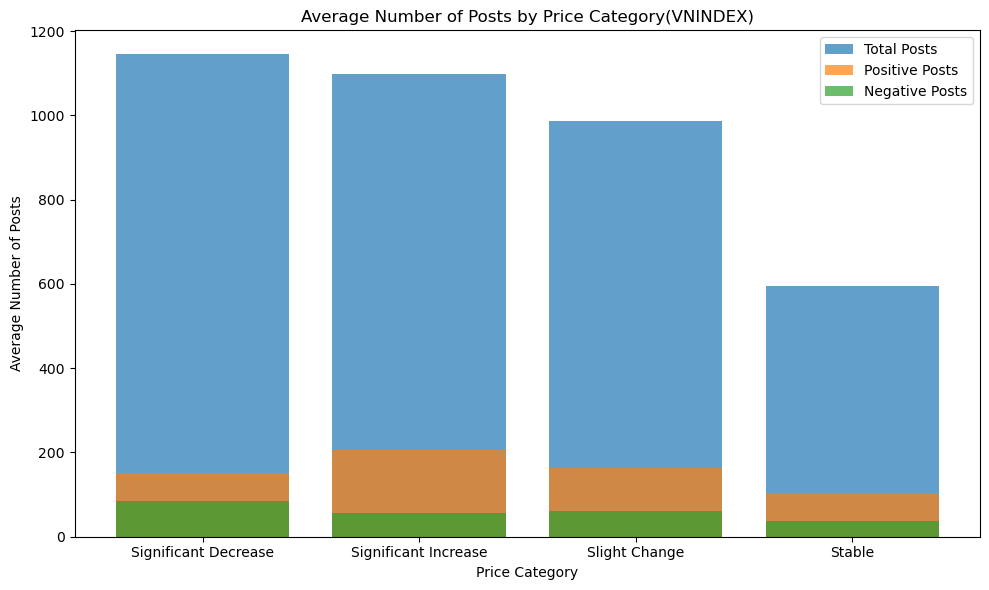

In [22]:
# Plotting average posts per category
categories = avg_posts.index
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total posts, positive posts, and negative posts
ax.bar(categories, avg_posts, label='Total Posts', alpha=0.7)
ax.bar(categories, avg_positive_posts, label='Positive Posts', alpha=0.7)
ax.bar(categories, avg_negative_posts, label='Negative Posts', alpha=0.7)

ax.set_title('Average Number of Posts by Price Category(VNINDEX)')
ax.set_xlabel('Price Category')
ax.set_ylabel('Average Number of Posts')
ax.legend()

plt.tight_layout()
plt.show()

Từ kết quả phân tích cũng như biểu đồ phía trên, dễ thấy rằng mã cổ phiếU VNINDEX luôn được dành sự quan tâm lớn kể cả trong những ngày mức giá duy trì ổn định, hay mức giá thay đổi không đáng kể. 

Cụ thể, số lượng bài viết trung bình khi giá cổ phiểu ổn định là gần 600, trong khi ở những ngày giá cố phiếu có sự thay đổi(bất kể lớn hay nhỏ), số lượng bài viết trung bình là hơn 1000. Điều tương tự với số lượng bài viết tích cực và tiêu cực.

#### 2.9: Statistics on the number of posts, number of positive posts, number of negative posts, total interactions,.. over time

Ta thực hiện thống kê số lượng bài viết, số lượng bài viết tích, số lượng bài viết tiêu cực, tổng số lượng tương tác của tất cả các mã chứng khoáng nói chung vào các ngày khác nhau cũng như là các thời điểm trong một ngày. Qua đó biết được những khoảng thời gian nào là khoảng thời gian cao điểm, khoảng thời gian thị trường chứng khoán diễn ra sôi động nhất

In [23]:
posts_df.rename(columns = {'date' : 'time'}, inplace = True)
posts_df.insert(3, 'date', posts_df['time'].dt.date)
posts_df.head(2)

,postID,originalContent,time,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,2024-11-06,<NA>,neutral,1,0,NaN,"{'symb': '^DJI', 'price': 43496.43}",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,2024-11-06,<NA>,neutral,0,0,NaN,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None


In [24]:
posts_df['word_count'] = posts_df['originalContent'].fillna('').str.split().str.len()
posts_df.head(2)

,postID,originalContent,time,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol,word_count
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,2024-11-06,<NA>,neutral,1,0,NaN,"{'symb': '^DJI', 'price': 43496.43}",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI,2
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,2024-11-06,<NA>,neutral,0,0,NaN,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None,15


In [25]:

posts_analyze = posts_df.groupby('date').agg(
    number_of_posts = ('postID', 'count'),
    number_of_positive_posts = ('sentiment', lambda x : (x == 'positive').sum()),
    number_of_negative_posts = ('sentiment', lambda x : (x == 'negative').sum()),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum'),
    stock_symbols_mentioned = ('symbol', lambda x : x.nunique())
).reset_index()

posts_analyze = posts_analyze.round(2)
posts_analyze.head(2)


,date,number_of_posts,number_of_positive_posts,number_of_negative_posts,average_posts_len,total_likes,total_replies,stock_symbols_mentioned
0,2024-09-06,6594,886,341,50.33,10468,14175,392
1,2024-09-07,1242,286,54,82.03,2786,4086,230


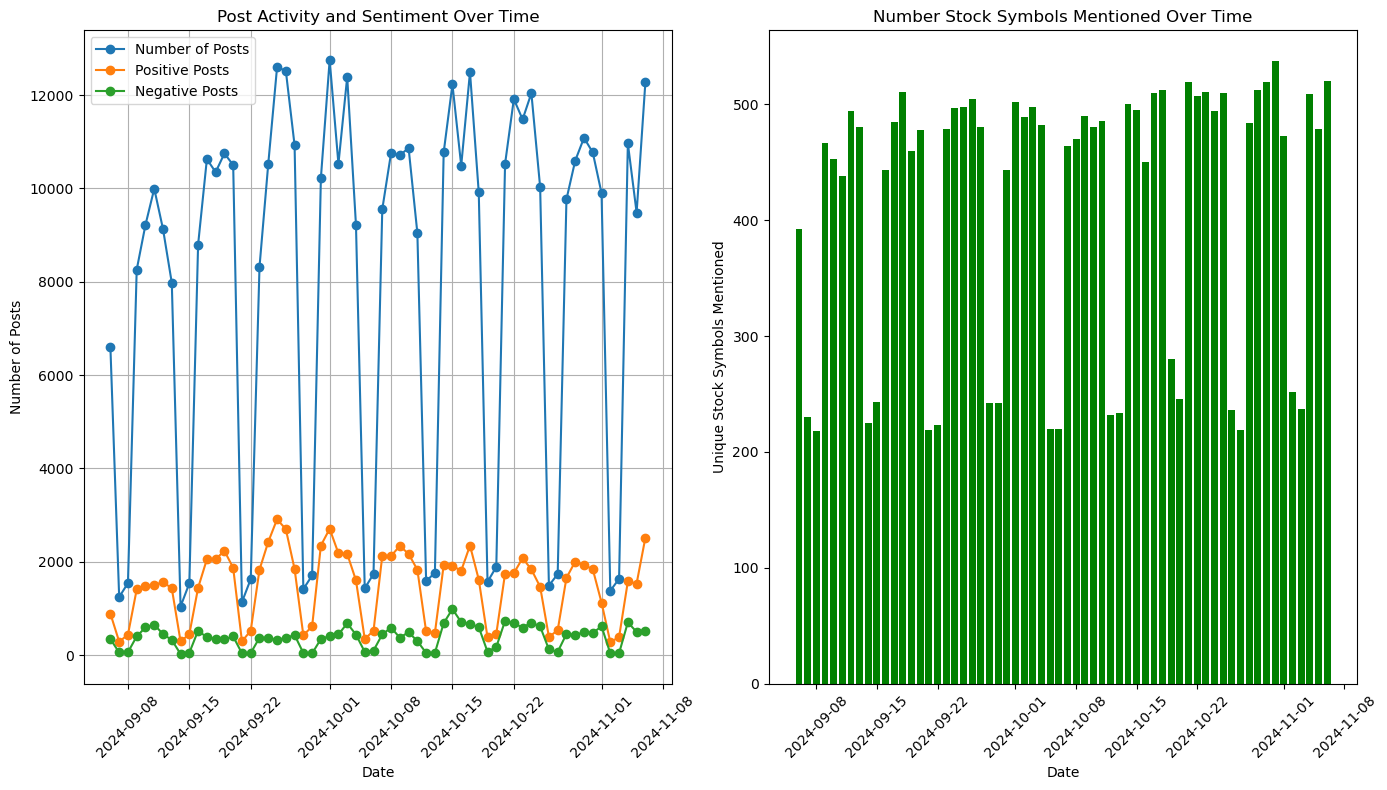

In [26]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Subplot 1: Number of Posts, Positive Posts, Negative Posts over time
plt.subplot(1, 2, 1)
plt.plot(posts_analyze['date'], posts_analyze['number_of_posts'], label='Number of Posts', marker='o')
plt.plot(posts_analyze['date'], posts_analyze['number_of_positive_posts'], label='Positive Posts', marker='o')
plt.plot(posts_analyze['date'], posts_analyze['number_of_negative_posts'], label='Negative Posts', marker='o')
plt.title('Post Activity and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)


# Subplot 2: Stock Symbols Mentioned over time
plt.subplot(1, 2, 2)
plt.bar(posts_analyze['date'], posts_analyze['stock_symbols_mentioned'], color='green')
plt.title('Number Stock Symbols Mentioned Over Time')
plt.xlabel('Date')
plt.ylabel('Unique Stock Symbols Mentioned')
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Nhìn chung từ hai đồ thị bên trên, ta thấy các giá trị như số lượng các bài viết, số lượng bài viết tiêu cực, số lượng bài viết tích và số lượng các mã chững khoán được đề cập tới đều biến động mạnh mẽ từng ngày, gần như thành hình ziczac. Điều này một lần nữa khẳng định sự khó đoán và bất thường của thị trường chứng khoán, thúc đẩy ta thực hiện những tính toán cẩn thận và chi tiết hơn trước khi đưa ra về những sự biến đỔi nói chung.

In [27]:
sentiment_analysis = posts_df.groupby('sentiment').agg(
    number_of_posts = ('postID', 'count'),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum'),
    stock_symbols_mentioned = ('symbol', lambda x: x.nunique())
).reset_index()

sentiment_analysis

,sentiment,number_of_posts,average_posts_len,total_likes,total_replies,stock_symbols_mentioned
0,negative,23261,45.149693,41720,73212,541
1,neutral,372614,57.393007,609447,838558,1372
2,positive,91393,98.856729,219205,289075,943


Ta thống kê các chỉ số liên quan đến các bài viết tiêu cực, bài viết tiêu cực và bài viết trung tính(neutral).

Nhìn chung số lượng bài viết trung tính chiếm đa số với gần 80% tổng số các bài viết. Các bài viết trung tính cũng có tổng lượng like, phản hồi, và số lượng mã chứng khoán được đề cập tới cao hơn đáng kể so với hai loại bài viết còn lại. Tuy vậy, theo như quan sát của nhóm, trong nhiều bài viết trung tính, nội dung có chứa lời lẽ thù địch, thù hấn hay công kích lẽ ra nên được xếp vào nhóm các bài viết tiêu cực, hoặc nhiềU bài viết thể hiện sự vui mừng, phấn khích đáng ra nên được xếp vào nhóm tích cực. 


Điều này gây lãng phí rất lớn, bởi ở phần phân tích sau, khi dự đoán về sự thay đổi trong giá trị cổ phiếu, tính toán dựa trên các bài viết tiêu cực và tích cực thường sẽ cho ra tỉ lệ tương quan lớn hơn, từ đó đưa ra những quyết định chính xác hơn nhiều so với các bài viết trung tính. Đây là một điểm mà sẽ được cải thiện về sau.

In [28]:
unique_users_posts_df = posts_df.drop_duplicates(subset='postID').copy()
user_activity = unique_users_posts_df.groupby('userid').agg(
    userName = ('username', 'first'),
    number_of_posts = ('postID', 'count'), 
    number_of_positive_posts = ('sentiment', lambda x : (x == 'positive').sum()),
    number_of_negative_posts = ('sentiment', lambda x : (x == 'negative').sum()),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum')
).reset_index()




Ta thực hiện thống kê về số lượng bài đăng, số lượng bài đăng tiêu cực, số lượng bài đăng tích cực, cũng như tổng lượng tương tác của từng cá nhân. Điều này, giúp ta có thể tìm được những người dùng tích cực nhất(đăng bài với nội dung mang tính xây dựng), hay loại bỏ đi những người dùng spam(đăng với nội dung spam, thường xuyên gắn link quảng cáo,..).

In [29]:
user_activity.sort_values(by = 'number_of_posts', ascending = False, inplace = True)
user_activity = user_activity.round(2)
user_activity.head(3)

,userid,userName,number_of_posts,number_of_positive_posts,number_of_negative_posts,average_posts_len,total_likes,total_replies
357,0406662e-2ee3-49fe-8ce1-317a1aec3dc8,gametaophoton,1168,0,0,24.01,328,1255
8109,5a1365a4-46fc-41d7-b021-45f7d02d639f,THÍCH CHƠI XÍCH ĐU,933,0,0,8.94,885,1067
88,00cafff2-e845-4022-bafe-5113a8e7924d,Helen Lan Anh,865,489,339,9.19,579,1292


C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128010 (\N{CROCODILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


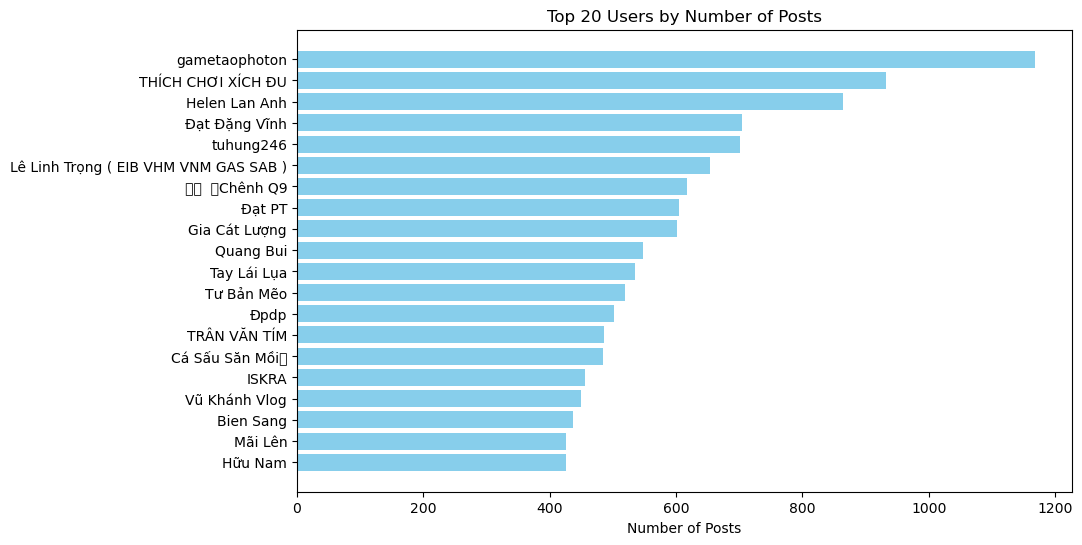

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128010 (\N{CROCODILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


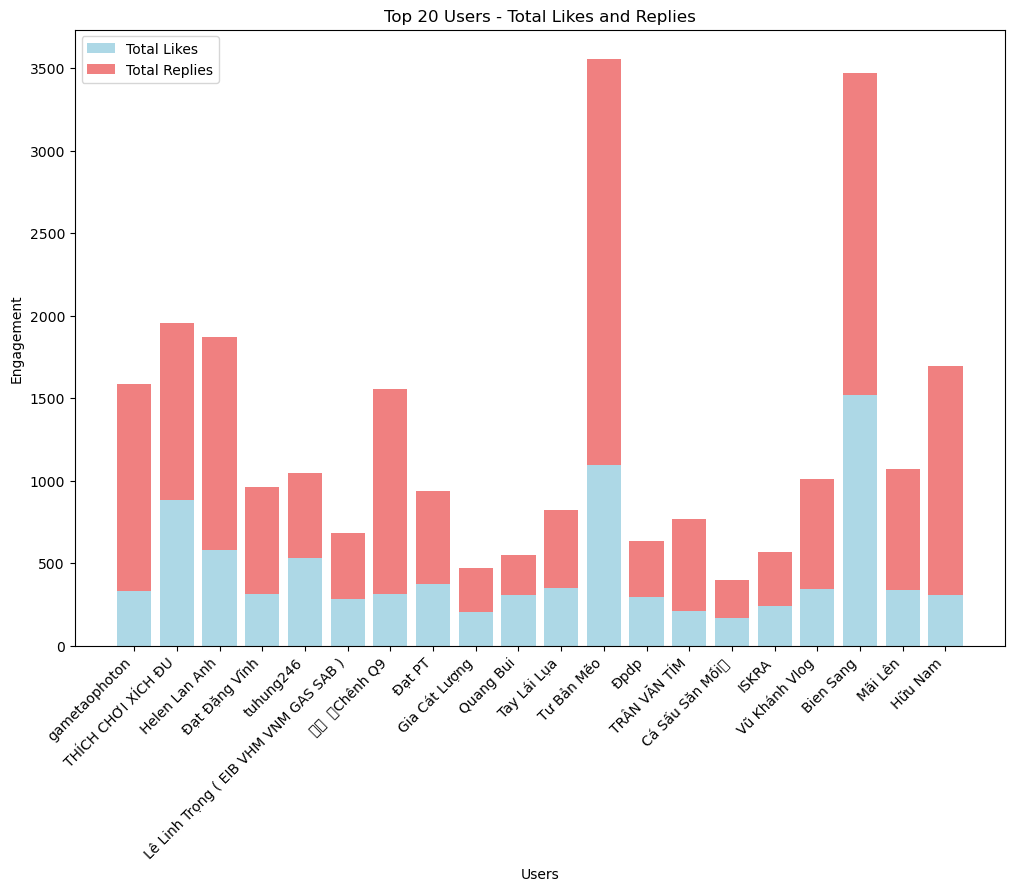

In [30]:
# Select top 20 users by number of posts
top_users = user_activity.nlargest(20, 'number_of_posts')
user_names = top_users['userName']

# Horizontal Bar Chart for `number_of_posts`
plt.figure(figsize=(10, 6))
plt.barh(user_names, top_users['number_of_posts'], color='skyblue')
plt.xlabel('Number of Posts')
plt.title('Top 20 Users by Number of Posts')
plt.gca().invert_yaxis()
plt.show()

# Stacked Bar Chart for `total_likes` and `total_replies`
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(user_names, top_users['total_likes'], label='Total Likes', color='lightblue')
ax.bar(user_names, top_users['total_replies'], bottom=top_users['total_likes'], label='Total Replies', color='lightcoral')

ax.set_xlabel('Users')
ax.set_ylabel('Engagement')
ax.set_title('Top 20 Users - Total Likes and Replies')
plt.xticks(rotation=45, ha='right')
ax.legend()
plt.show()

Từ các biểu đồ và thống kê trên có thể thấy, các người dùng như gametaophoton, thích chơi xích đu hay Helen Lan Anh,.. là những người có số lượng bài viết cao nhất. Tuy vậy, về tổng số lượng phản hồi và likes, Tư bản Mẽo hay Bien Sang,.. mới là những người đứng đầu. Điều đó cho thấy mức độ ảnh hưởng lẫn uy tín của mỗi người đăng không chỉ phản ảnh bởi số lượng bài viết mà còn bởi chất lượng bài viết, cũng như là những dự đoán mà người đó đưa ra.

In [31]:
symbol_mentions_over_time = posts_df.groupby(['date', 'symbol']).agg(
    number_of_mentions = ('symbol', 'count'),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum')
).reset_index()

In [32]:
symbol_mentions_over_time.round(2).head(2)

,date,symbol,number_of_mentions,average_posts_len,total_likes,total_replies
0,2024-09-06,$APT,1,11.0,0,0
1,2024-09-06,$BTC,70,31.8,83,289


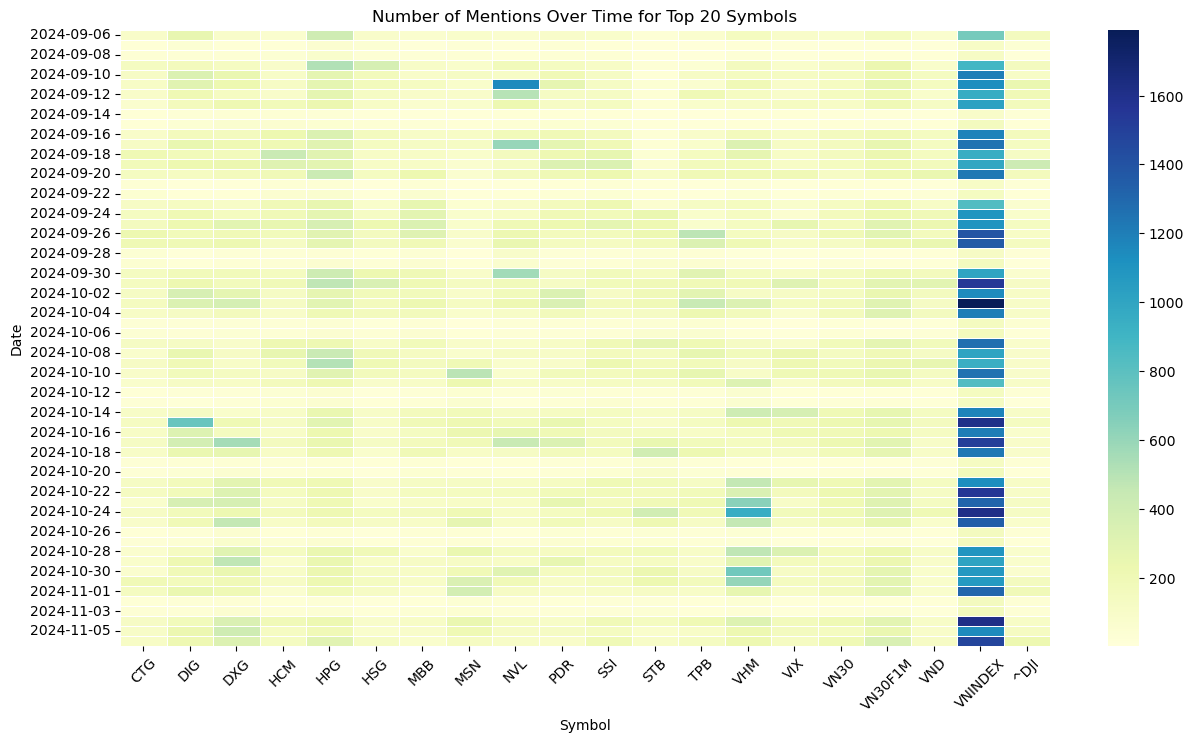

In [33]:
# Filter top 20 symbols based on total number of mentions
top_symbols = symbol_mentions_over_time.groupby('symbol')['number_of_mentions'].sum().nlargest(20).index
top_symbol_data = symbol_mentions_over_time[symbol_mentions_over_time['symbol'].isin(top_symbols)]

# Pivot the data for heatmap
heatmap_data = top_symbol_data.pivot_table(index='date', columns='symbol', values='number_of_mentions', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title('Number of Mentions Over Time for Top 20 Symbols')
plt.xlabel('Symbol')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

Như đã nói ở phía trên, mã chứng khoán VNINDEX được sự ưu ái rất lớn trong trong các mô hình và tính toán của chúng tôi, bởi sự phổ biến và quan tâm to lớn của cộng đồng chứng khoán dành cho nó.

Từ biểu đồ heatmap và các thống kê phía trên, ta thấy số lượng bài đăng đề cập đến VNINDEX vượt trội hoàn toàn so với các mã chứng khoán khác. 

Tuy vậy Một số mã chứng khoán phổ biến ngoài VNINDEX mà ta có thể thực hiện các tính toán, thống kê sau này, có thể kể đến như VHM, MSN, DXG, ...

In [34]:
posts_df['hour'] = posts_df['time'].dt.hour  # Extract the hour from the date
activity_by_hour = posts_df.groupby('hour').agg(
    number_of_posts = ('postID', 'count'),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum')
).reset_index()

In [35]:
activity_by_hour = activity_by_hour.round(2)
activity_by_hour.head(2)

,hour,number_of_posts,average_posts_len,total_likes,total_replies
0,0,2830,129.89,7230,8790
1,1,1184,128.18,2695,4461


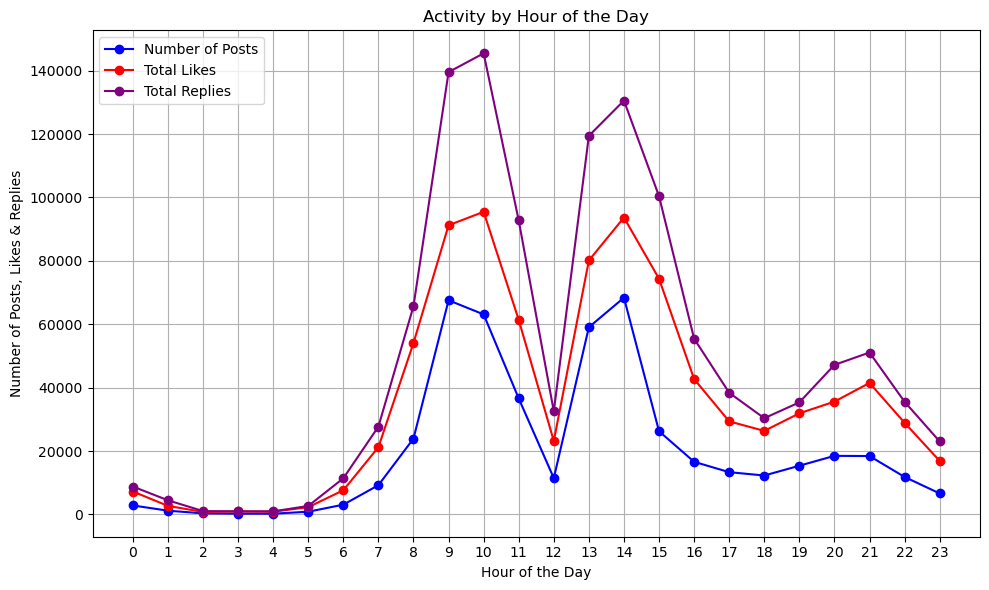

In [36]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the three metrics (number_of_posts, total_likes, total_replies) on the primary y-axis
plt.plot(activity_by_hour['hour'], activity_by_hour['number_of_posts'], marker='o', label='Number of Posts', color='blue')
plt.plot(activity_by_hour['hour'], activity_by_hour['total_likes'], marker='o', label='Total Likes', color='red')
plt.plot(activity_by_hour['hour'], activity_by_hour['total_replies'], marker='o', label='Total Replies', color='purple')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts, Likes & Replies')
plt.title('Activity by Hour of the Day')

# Customize ticks and grid
plt.xticks(range(24))
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Ta thực hiện thống kê về các hoạt động đăng bài và tương tác vào từng thời điểm cụ thể trong ngày.

Dễ thấy, hoạt động bàn luận diễn ra sôi nổi nhất vào các khoảng thời gian từ 9 đến 10 giờ sáng và từ 13 đến 14 giờ chiều, ngược lại rất hoạt động diễn ra trong khoảng từ 0 đén 7 giờ sáng. Lý do hiển nhiên nhất cho sự chênh lệch trên là nó phù hợp thời gian sinh hoạt của mỗi người. Ngoài ra, vào các thời điểm giữa ngày, hoạt động mua bán cổ phiếu cũng diễn ra sôi nổi nhất, giải thích cho sự quan tâm của các nhà đầU tư.

---
## Part 2: Advanced analysis and calculations using probabilistic approaches

Ta sang phần 2, những tính toán và thống kê chuyên sâu sử dụng các phương pháp tính xác suất(Suy luận Bayes, Xích Markov,..). Ở phần này, ta sẽ tập chung nhiều vào việc dự đoán sự tăng giảm của giá trị cổ phiếu dựa trên nhiều yếu tố khác nhau, do đây là thông tin hữu ích cũng như được các nhà đầU tư quan tâm nhất. 

#### 1.1: Store data for each symbols in a dict

In [37]:
import os
import re
# Create a directory to store the output files
symbol_list = posts_df['symbol'].unique()
symbol_list = symbol_list.tolist()

valid_symbols = []
invalid_symbols = []
# Remove None from the list
symbol_list = [symbol for symbol in symbol_list if symbol is not None]
symbol_price_data_dict = {}
symbol_price_data_dict = {}
for symbol in symbol_list:
    clean_symbol = re.sub(r'[^a-zA-Z0-9]', '', symbol)
    # check if the file exists
    if not os.path.exists(f"price/{clean_symbol}.csv"):
        symbol_price_data_dict[symbol] = None
        invalid_symbols.append(symbol)
        continue
    data = pd.read_csv(f"price/{clean_symbol}.csv")
    symbol_price_data_dict[symbol] = data
    valid_symbols.append(symbol)

symbol_groups = posts_df.groupby('symbol')


symbols_data_dict = {symbol : data for symbol, data in symbol_groups}

# Print success message
print(f"Successfully loaded data from price folder for {len(valid_symbols)} symbols.")
print(f"Price files not found for {len(invalid_symbols)} symbols.")



Successfully loaded data from price folder for 1157 symbols.
Price files not found for 324 symbols.


Trước hết chúng ta thực hiện lưu thông tin cho mỗi mã chững khoán vào một dictionary. Cụ thể:

Ta lấy danh sách các ký hiệu chứng khoán từ dataframe posts_df.
Kiểm tra sự tồn tại của tệp CSV cho mỗi ký hiệu trong thư mục "price".
Nếu tệp tồn tại, đọc dữ liệu vào và lưu vào từ điển symbol_price_data_dict. Nếu không, thêm ký hiệu vào danh sách invalid_symbols.
Nhóm dữ liệu trong posts_df theo ký hiệu chứng khoán và lưu vào từ điển symbols_data_dict.

In ra kết quả:
Số lượng các ký hiệu được tải dữ liệu thành công.
Số lượng các ký hiệu không có files hợp lệ.

Giải thích thêm: 
khác với file clean_potst.csv, các file trong file thư mục price chứa thông tin về các hoạt động mua bán của từng loại cổ phiếu. Mỗi phiên giao dịch kéo dài 30 phút, đi cùng với đó là giá khởi điểm, giá cao nhất, giá thấp nhất, giá đóng và khối lượng giao dịch.
Không phải mã chứng khoán nào được đề cập trong dataframe posts_df cũng có file thông tin tương ứNg. Nhóm chỉ thực hiện khai thác dữ liệu của những mã có độ phổ biến cao, được biết đến rộng rãi, được đề cập và bàn luận nhiều, nhằm đảm bảo khối lượng dataset là đủ lớn để thực hiện các phép tính toán xác suất.

In [38]:
# check data is store properly
symbols_data_dict['$AAVE'].head(2)

,postID,originalContent,time,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol,word_count,hour
73478,28938964,Short mạnh thôi người anh em,2024-10-29 12:46:20.700000+07:00,2024-10-29,<NA>,neutral,0,0,NaN,"{'symb': '$AAVE', 'price': 153.62}",Bàn Tay Vô Hình,2d980e79-7b61-4ac7-9ad6-6aa20a217b2b,0,1,153.62,$AAVE,6,12
149123,28772283,Cập nhật 21h tối 19/10: Btc điều chỉnh làm các...,2024-10-19 21:04:18.310000+07:00,2024-10-19,<NA>,neutral,0,0,NaN,"{'symb': '$AAVE', 'price': 158.86}",geo,d9f30fe7-0be1-457f-8cda-f48b83c3342c,0,1,158.86,$AAVE,32,21


#### 1.2: Data Processing and Aggregation for Stock Symbol: Combining Social Media Post Data and Stock Price Changes 

In [39]:
import pandas as pd
from dateutil.parser import isoparser
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def to_post_analysis_dataframe_time_series(symbol_name):

    # Sort symbol data by time and calculate price change
    symbol_data_frame = symbols_data_dict[symbol_name]
    symbol_data_frame = symbol_data_frame.sort_values(by='time', ascending=True)
    symbol_data_frame['price_change'] = symbol_data_frame['price'].diff()
    
    # Import price data for each traded period
    price_data_frame = symbol_price_data_dict[symbol_name]
    if price_data_frame is None:
        return None
    
    price_data_frame['time'] = price_data_frame['time'].astype('string')
    price_data_frame['time'] = price_data_frame['time'].apply(
        lambda x: isoparser().isoparse(x) if pd.notnull(x) else pd.NaT
    )
    price_data_frame['date'] = price_data_frame['time'].dt.date

    # Calculate daily price change
    daily_change = price_data_frame.groupby('date').apply(
        lambda x : pd.Series({
            'open' : x['open'].iloc[0],
            'high' : x['high'].max(),
            'close' : x['close'].iloc[-1],
            'daily_change' : x['close'].iloc[-1] - x['open'].iloc[0]
        })
    ).reset_index()
    
    # Aggregate post data for each date related to the symbol
    posts_analyze_symbol = symbols_data_dict[symbol_name].groupby('date').agg(
        number_of_posts=('postID', 'count'),
        number_of_positive_posts=('sentiment', lambda x: (x == 'positive').sum()),
        number_of_negative_posts=('sentiment', lambda x: (x == 'negative').sum()),
        average_posts_len=('word_count', 'mean'),
        total_likes=('totalLikes', 'sum'),
        total_replies=('totalReplies', 'sum'),
    ).reset_index()

    # Round results and sort by date
    posts_analyze_symbol = posts_analyze_symbol.round(2)
    posts_analyze_symbol = posts_analyze_symbol.sort_values(by='date', ascending=True)

    # Merge posts data with daily price changes, keeping all dates from the price data
    posts_analyze_symbol = posts_analyze_symbol.merge(
    daily_change[['date', 'open', 'high', 'close', 'daily_change']],
    on='date', 
    how='right'
    ).fillna(0)

    # Fill any missing values with 0
    
    
    return posts_analyze_symbol


Chức năng to_post_analysis_dataframe(symbol_name) được xây dựng với mục đích kết hợp dữ liệu bài viết (từ tệp clean_posts.csv) và dữ liệu về hoạt động mua bán cổ phiếu (từ thư mục Price). Kết quả là một dataframe mới cung cấp cái nhìn tổng thể về mức độ tương tác các bài viết và biến động giá cổ phiếu cho mỗi ký hiệu chứng khoán (symbol).

Cụ thể:
Trước hết ta đọc và xử lý dữ liệu từ các bài viết.

Dữ liệu bài viết được tải từ tệp clean_posts.csv và nhóm theo ngày (cột date).
Các chỉ số thống kê được tính toán cho từng ngày, bao gồm:
number_of_posts: Số lượng bài viết trong ngày.
number_of_positive_posts: Số bài viết có cảm xúc tích cực.
number_of_negative_posts: Số bài viết có cảm xúc tiêu cực.
average_posts_len: Độ dài trung bình của các bài viết (số từ trung bình).
total_likes: Tổng số lượt thích trong ngày.
total_replies: Tổng số lượt trả lời trong ngày.
Đọc và xử lý dữ liệu giá cổ phiếu:

Dữ liệu giá cổ phiếu được lấy từ thư mục Price, với mỗi tệp chứa dữ liệu giá cho một mã cổ phiếu.
Dữ liệu giá cổ phiếu được xử lý để đảm bảo thời gian (cột time) được chuyển đổi về kiểu datetime và nhóm theo ngày (cột date).
Các thông tin về giá trong ngày được tính toán, bao gồm:
open: Giá mở cửa của ngày.
high: Giá cao nhất trong ngày.
close: Giá đóng cửa của ngày.
daily_change: Sự thay đổi giá trong ngày (chênh lệch giữa giá đóng cửa và giá mở cửa).
Kết hợp dữ liệu bài viết và giá cổ phiếu:

Sau khi dữ liệu bài viết và giá cổ phiếu đã được tính toán và xử lý, chúng sẽ được kết hợp với nhau dựa trên cột date.
Kết quả là một dataframe mới với các cột:
date, number_of_posts, number_of_positive_posts, number_of_negative_posts, average_posts_len, total_likes, total_replies, open, high, close, daily_change.

Điều chỉnh dữ liệu:
Dữ liệu sẽ được làm sạch và kiểm tra để đảm bảo không có giá trị thiếu. Nếu có, giá trị thiếu sẽ được điền bằng 0.
Sau khi kết hợp dữ liệu từ hai nguồn, kết quả sẽ được sắp xếp theo thứ tự ngày (cột date).

Kết quả:
Hàm trả về một DataFrame kết hợp chứa các thông tin tóm tắt cho mỗi ngày, bao gồm cả biến động giá cổ phiếu và mức độ tương tác bài viết. DataFrame này có thể được sử dụng cho các phân tích tiếp theo về mối quan hệ giữa sự thay đổi giá cổ phiếu và mức độ quan tâm của các bài viết.

Cách sử dụng:

Hàm có thể được gọi với tham số symbol_name, tức là mã chứng khoán muốn phân tích.
Ví dụ: to_post_analysis_dataframe('AAPL') sẽ trả về dataframe kết hợp cho cổ phiếu Apple.


In [40]:
# Store the post analysis data for each symbol in a dictionary
symbols_posts_data = {symbol : to_post_analysis_dataframe_time_series(symbol) for symbol in valid_symbols}


### Task 2: Perform basic calculations and analysis

#### 2.1: Using Bayesian Inference to predict the changes in prices

In [41]:
# check if data in price folders are loaded successfully
symbols_posts_data['VNINDEX'].head(2)

,date,number_of_posts,number_of_positive_posts,number_of_negative_posts,average_posts_len,total_likes,total_replies,open,high,close,daily_change
0,2024-09-04,0.0,0.0,0.0,0.0,0,0,1273.86,1277.27,1275.80,1.94
1,2024-09-05,0.0,0.0,0.0,0.0,0,0,1276.46,1282.21,1268.21,-8.25


#### 2.1.1 Create probability_bayesian_inference_posts Function
Calculates the conditional probabilities of stock price changes (up, down, stable) based on post activity levels (high, moderate, low) using Bayesian inference. Takes columns for dates, price changes, and post counts as inputs, and returns a dictionary of probabilities.

$$
P(\text{Price changes} \mid \text{Number of Posts}) = \frac{P(\text{Number of Posts} \mid \text{Price changes}) \times P(\text{Price changes})}{P(\text{Number of Posts})}
$$

$$
P(\text{Number of Posts} \mid \text{Price changes}) = \frac{P(\text{Number of Posts and Price changes})}{P(\text{Price changes})}
$$

$$
P(\text{Number of Posts}) = \frac{\sum (\text{dataframe['Number of Posts']} =>< \text{Threshold})}{\text{Number of Trading Days}}
$$

$$
P(\text{Price changes}) = \frac{\sum (\text{dataframe['Price changes']} =>< \text{0})}{\text{Number of Trading Days}}

In [42]:
def probability_bayesian_inference_posts(date_column, price_column, posts_column):
    # Retrieve the data frame for the given stock symbol
    symbol_data_frame = pd.DataFrame({
        'date' : date_column,
        'daily_change' : price_column,
        'number_of_posts' : posts_column
    })
    
    # handle NULL case
    if symbol_data_frame is None:
        return 'Data not found for the given symbol.' 
    
    # Calculate the number of traded days (unique dates)
    number_traded_days = symbol_data_frame['date'].nunique()
    
    # Calculate the prior probabilities for price movements (up, down, stable)
    prior_price_up = (symbol_data_frame['daily_change'] > 0).sum() / number_traded_days
    prior_price_drop = (symbol_data_frame['daily_change'] < 0).sum() / number_traded_days
    prior_price_stable = (symbol_data_frame['daily_change'] == 0).sum() / number_traded_days
    
    # Calculate the average and standard deviation of posts per day
    mean_posts = symbol_data_frame['number_of_posts'].mean()
    std_dev_posts = symbol_data_frame['number_of_posts'].std()
    
    # Define the thresholds for categorizing the number of posts (low, high, normal)
    low_threshold = max(0, mean_posts - std_dev_posts)  # Low posts: below one standard deviation
    high_threshold = mean_posts + std_dev_posts         # High posts: above one standard deviation
  
    # Calculate the number of days for each activity category (high, low, normal posts)
    high_activity_days = (symbol_data_frame['number_of_posts'] > high_threshold).sum()
    low_activity_days = (symbol_data_frame['number_of_posts'] < low_threshold).sum()
    normal_activity_days = number_traded_days - high_activity_days - low_activity_days
    
    # Calculate the probabilities of high, low, and normal posting activity
    high_activity_prob = high_activity_days / number_traded_days if number_traded_days > 0 else 0
    low_activity_prob = low_activity_days / number_traded_days if number_traded_days > 0 else 0
    normal_activity_prob = 1 - high_activity_prob - low_activity_prob
    
    # Calculate the probabilities of different combinations of posts and price movements for each category
    # Case 1: High number of posts
    P_high_posts_and_price_up = ((symbol_data_frame['number_of_posts'] > high_threshold) 
                                 & (symbol_data_frame['daily_change'] > 0)).sum() / number_traded_days
    P_high_posts_and_price_down = ((symbol_data_frame['number_of_posts'] > high_threshold) 
                                   & (symbol_data_frame['daily_change'] < 0)).sum() / number_traded_days
    P_high_posts_and_price_stable = ((symbol_data_frame['number_of_posts'] > high_threshold) 
                                     & (symbol_data_frame['daily_change'] == 0)).sum() / number_traded_days
    
    # Case 2: Low number of posts
    P_low_posts_and_price_up = ((symbol_data_frame['number_of_posts'] < low_threshold) 
                                 & (symbol_data_frame['daily_change'] > 0)).sum() / number_traded_days
    P_low_posts_and_price_down = ((symbol_data_frame['number_of_posts'] < low_threshold) 
                                   & (symbol_data_frame['daily_change'] < 0)).sum() / number_traded_days
    P_low_posts_and_price_stable = ((symbol_data_frame['number_of_posts'] < low_threshold) 
                                     & (symbol_data_frame['daily_change'] == 0)).sum() / number_traded_days
    
    # Case 3: Moderate number of posts (between low and high thresholds)
    P_moderate_posts_and_price_up = (
        ((symbol_data_frame['number_of_posts'] >= low_threshold) & 
        (symbol_data_frame['number_of_posts'] <= high_threshold) & 
        (symbol_data_frame['daily_change'] > 0)).sum() / number_traded_days
    )
    P_moderate_posts_and_price_down = (
        ((symbol_data_frame['number_of_posts'] >= low_threshold) & 
        (symbol_data_frame['number_of_posts'] <= high_threshold) & 
        (symbol_data_frame['daily_change'] < 0)).sum() / number_traded_days
    )
    P_moderate_posts_and_price_stable = (
        ((symbol_data_frame['number_of_posts'] >= low_threshold) & 
        (symbol_data_frame['number_of_posts'] <= high_threshold) & 
        (symbol_data_frame['daily_change'] == 0)).sum() / number_traded_days
    )
        
    # Now, calculate the conditional probabilities P(Posts | Price Change) using Bayes' theorem
    # For each price change category (up, down, stable), calculate the conditional probabilities
    
    # Calculate P(High Posts | Price changes)
    # Follow the formula: P(High Posts | Price Up) = P(High Posts and Price Up) / P(Price changes)
    P_high_posts_given_price_up = P_high_posts_and_price_up / prior_price_up if prior_price_up > 0 else 0
    P_high_posts_given_price_down = P_high_posts_and_price_down / prior_price_drop if prior_price_drop > 0 else 0
    P_high_posts_given_price_stable = P_high_posts_and_price_stable / prior_price_stable if prior_price_stable > 0 else 0
    
    # Calculate P(Moderate Posts | Price Up)
    # Follow the formula: P(Moderate Posts | Price Up) = P(Moderate Posts and Price changes) / P(Price changes)
    P_moderate_posts_given_price_up = P_moderate_posts_and_price_up / prior_price_up if prior_price_up > 0 else 0
    P_moderate_posts_given_price_down = P_moderate_posts_and_price_down / prior_price_drop if prior_price_drop > 0 else 0
    P_moderate_posts_given_price_stable = P_moderate_posts_and_price_stable / prior_price_stable if prior_price_stable > 0 else 0
    
    # Calculate P(Low Posts | Price Up)
    # Follow the formula: P(Low Posts | Price Up) = P(Low Posts and Price changes) / P(Price changes)
    P_low_posts_given_price_up = P_low_posts_and_price_up / prior_price_up if prior_price_up > 0 else 0
    P_low_posts_given_price_down = P_low_posts_and_price_down / prior_price_drop if prior_price_drop > 0 else 0
    P_low_posts_given_price_stable = P_low_posts_and_price_stable / prior_price_stable if prior_price_stable > 0 else 0
    
    # Calculate the final probabilities for price changes given high, moderate, and low posts
    # Follow the formula: P(Price changes | Posts) = [P(Posts | Price changes) * P(Price changes)] / P(Posts)
    P_price_up_given_high_posts = (P_high_posts_given_price_up * prior_price_up) / high_activity_prob if high_activity_prob > 0 else 0
    P_price_down_given_high_posts = (P_high_posts_given_price_down * prior_price_drop) / high_activity_prob if high_activity_prob > 0 else 0
    P_price_stable_given_high_posts = (P_high_posts_given_price_stable * prior_price_stable) / high_activity_prob if high_activity_prob > 0 else 0

    P_price_up_given_moderate_posts = (P_moderate_posts_given_price_up * prior_price_up) / normal_activity_prob if normal_activity_prob > 0 else 0
    P_price_down_given_moderate_posts = (P_moderate_posts_given_price_down * prior_price_drop) / normal_activity_prob if normal_activity_prob > 0 else 0
    P_price_stable_given_moderate_posts = (P_moderate_posts_given_price_stable * prior_price_stable) / normal_activity_prob if normal_activity_prob > 0 else 0

    P_price_up_given_low_posts = (P_low_posts_given_price_up * prior_price_up) / low_activity_prob if low_activity_prob > 0 else 0
    P_price_down_given_low_posts = (P_low_posts_given_price_down * prior_price_drop) / low_activity_prob if low_activity_prob > 0 else 0
    P_price_stable_given_low_posts = (P_low_posts_given_price_stable * prior_price_stable) / low_activity_prob if low_activity_prob > 0 else 0

    # Return the final conditional probabilities for each scenario
    return {
    "P(Price Up | High Posts)": round(P_price_up_given_high_posts, 4),
    "P(Price Down | High Posts)": round(P_price_down_given_high_posts, 4),
    "P(Price Stable | High Posts)": round(P_price_stable_given_high_posts, 4),
    
    "P(Price Up | Moderate Posts)": round(P_price_up_given_moderate_posts, 4),
    "P(Price Down | Moderate Posts)": round(P_price_down_given_moderate_posts, 4),
    "P(Price Stable | Moderate Posts)": round(P_price_stable_given_moderate_posts, 4),
    
    "P(Price Up | Low Posts)": round(P_price_up_given_low_posts, 4),
    "P(Price Down | Low Posts)": round(P_price_down_given_low_posts, 4),
    "P(Price Stable | Low Posts)": round(P_price_stable_given_low_posts, 4)
}


Hàm probability_bayesian_inference_posts được thiết kế để áp dụng phương pháp suy luận Bayes thực hiện các tính toán xác suất có điều kiện liên quan đến sự thay đổi giá cổ phiếu (tăng, giảm, ổn định) dựa trên mức độ hoạt động của bài viết (cao, trung bình, thấp). Hàm này sử dụng dữ liệu ngày giao dịch, thay đổi giá cổ phiếu và số lượng bài viết để tính toán xác suất của từng tình huống.

Cụ thể:

Dữ liệu được cung cấp thông qua ba cột: date_column (ngày giao dịch), price_column (thay đổi giá cổ phiếu hàng ngày), và posts_column (số lượng bài viết trong ngày).
Các cột này được kết hợp vào một dataframe duy nhất để dễ dàng xử lý và phân tích.

Ta xử lý giá trị NULL:
Nếu dữ liệu không được cung cấp hoặc không hợp lệ (có giá trị NULL), hàm sẽ trả về thông báo lỗi 'Data not found for the given symbol.'.

Sau bước chuẩn bị ta thực hiện tính toán:

Trước hết là các xác suất tiên nghiệm (Prior Probabilities).
Xác suất giá tăng (prior_price_up): Tính toán tỷ lệ ngày giá cổ phiếu tăng (giá đóng cửa lớn hơn giá mở cửa).
Xác suất giá giảm (prior_price_drop): Tính toán tỷ lệ ngày giá cổ phiếu giảm (giá đóng cửa nhỏ hơn giá mở cửa).
Xác suất giá ổn định (prior_price_stable): Tính toán tỷ lệ ngày giá cổ phiếu ổn định (giá đóng cửa bằng giá mở cửa).
Tính toán các đặc trưng của bài viết:

Trung bình số lượng bài viết (mean_posts) và độ lệch chuẩn (std_dev_posts) của số lượng bài viết trong các ngày giao dịch.
Dựa vào các giá trị này, xác định các ngưỡng để phân loại bài viết thành ba mức độ: thấp, vừa, cao.

TiếP theo ta tính toán xác suất cho mỗi mức độ hoạt động bài viết:

Xác suất bài viết nhiều (high_activity_prob): Tính toán tỷ lệ các ngày có số lượng bài viết cao (trên ngưỡng cao).
Xác suất bài viết ít (low_activity_prob): Tính toán tỷ lệ các ngày có số lượng bài viết thấp (dưới ngưỡng thấp).
Xác suất bài viết bình thường (normal_activity_prob): Xác suất của các ngày có số lượng bài viết trong phạm vi trên ngưỡng thấp và dưới ngưỡng cao.

Sau đó, thực hiện tính toán các xác suất kết hợp của bài viết và sự thay đổi giá cổ phiếu cho từng loại bài viết:

High Posts: Tính xác suất sự kết hợp giữa bài viết nhiều và giá cổ phiếu tăng, giảm hoặc ổn định.
Low Posts: Tính xác suất sự kết hợp giữa bài viết ít và giá cổ phiếu tăng, giảm hoặc ổn định.
Moderate Posts: Tính xác suất sự kết hợp giữa bài viết trung bình và giá cổ phiếu tăng, giảm hoặc ổn định.

Nhìn chung các tính toán đều tuân thủ chặt chẽ định luật Bayes, nhằm cho ra kết quả có độ khác quan và chính xác cao nhất.

In [43]:
VNINDEX_posts_df = symbols_posts_data['VNINDEX']
P_VNINDEX_number_of_posts = probability_bayesian_inference_posts(VNINDEX_posts_df['date'], VNINDEX_posts_df['daily_change'], VNINDEX_posts_df['number_of_posts'])
P_VNINDEX_number_positive_posts = probability_bayesian_inference_posts(VNINDEX_posts_df['date'], VNINDEX_posts_df['daily_change'], VNINDEX_posts_df['number_of_positive_posts'])
P_VNINDEX_number_negative_posts = probability_bayesian_inference_posts(VNINDEX_posts_df['date'], VNINDEX_posts_df['daily_change'], VNINDEX_posts_df['number_of_negative_posts'])

Ta áp dụng hàm tính toán trên trước hết cho mã cổ phiểu VNINDEX. Cụ thể:

Ta gán giá trị trước đó đã lưu săn trong dictionary vào biến VNINDEX_posts_df.
Sau đó lần lượt sử dụng hàm probability_bayesian_inference_posts ba lần để tính toán xác suất cho các biến động giá tương ứng với số lượng bài viết tích cực, tiêu cực và tổng số bài viết.

#### 2.1.2 Heatmap illustration for the probability of the changes in price pf VNINDEX given number of posts, number of positive posts, number of negative posts

In [44]:
# Create a function to convert probability in the dict into a matrix

def dict_to_matrix(data):
    # Extract row and column labels from keys
    rows = sorted(set(key.split(" | ")[0].replace("P(", "") for key in data.keys()))
    columns = sorted(set(key.split(" | ")[1].replace(")", "") for key in data.keys()))
    
    # Create an empty DataFrame with rows as index and columns as columns
    matrix_df = pd.DataFrame(index=rows, columns=columns)
    
    # Populate the DataFrame with values from the dictionary
    for key, value in data.items():
        row_label = key.split(" | ")[0].replace("P(", "")
        col_label = key.split(" | ")[1].replace(")", "")
        matrix_df.loc[row_label, col_label] = value

    # Convert the DataFrame to a matrix (NumPy array) and fill NaN with 0 if needed
    matrix = matrix_df.fillna(0).values  # .fillna(0) is used to replace any missing values with 0

    return matrix_df, matrix

data = P_VNINDEX_number_positive_posts
matrix_df, matrix_positive = dict_to_matrix(data)

print("DataFrame:\n", matrix_df)
print("\nMatrix:\n", matrix_positive)


DataFrame:
              High Posts Low Posts Moderate Posts
Price Down          0.0       0.6         0.6216
Price Stable        0.0       0.0            0.0
Price Up            1.0       0.4         0.3784

Matrix:
 [[0.     0.6    0.6216]
 [0.     0.     0.    ]
 [1.     0.4    0.3784]]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22376\3937639811.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix = matrix_df.fillna(0).values  # .fillna(0) is used to replace any missing values with 0


Do hàm probability_bayesian_inference_posts trả về kết quả có kiểu dữ liệu dictionary, ta xây dựng hàm mới dict_to_matrix, để biến đổi kết quả sang dạng mảng 2 chiều(matrix), để dễ thực hiện các bước tính toán, cũng như trực quan hoá.

#### 2.1.3 Heatmap Illustration function: Probability of Price Changes in VNINDEX

In [45]:
def plot_probability_heatmap(data, title):
    # Check if data is a dictionary, convert it to matrix
    if isinstance(data, dict):
        _, matrix = dict_to_matrix(data)
    
    # Check if data is a 3x3 matrix (NumPy array)
    elif isinstance(data, np.ndarray) and data.shape == (3, 3):
        matrix = data
    else:
        raise ValueError("Data must be either a dictionary or a 3x3 matrix.") 
    
    col_labels = ['High Posts', 'Moderate Posts', 'Low Posts']
    row_labels = ['Price Down', 'Price Stable', 'Price Up']
    
    # Create the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=col_labels, yticklabels=row_labels)
    plt.title(title)
    plt.xlabel('Number of posts')
    plt.ylabel('Changes in price')
    plt.yticks(rotation = 0) 
    plt.show()
 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22376\3937639811.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix = matrix_df.fillna(0).values  # .fillna(0) is used to replace any missing values with 0


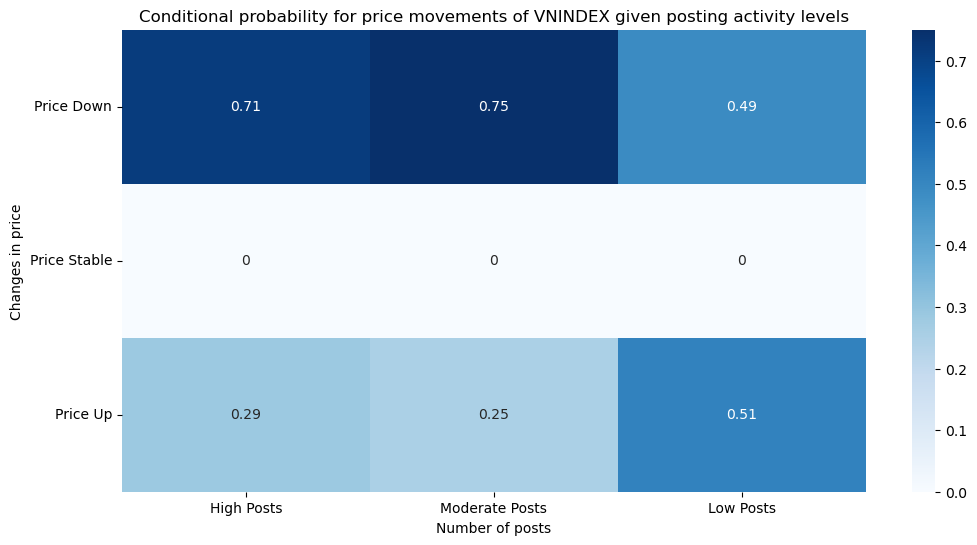

In [46]:
plot_probability_heatmap(P_VNINDEX_number_of_posts, 'Conditional probability for price movements of VNINDEX given posting activity levels')

Từ biểu đồ heatmap trên dễ thấy, xác suất giá trị cổ phiếu giảm luôn cao cho dù số lượng bài viết có cao, thấp hay duy trì ổn định.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22376\3937639811.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix = matrix_df.fillna(0).values  # .fillna(0) is used to replace any missing values with 0


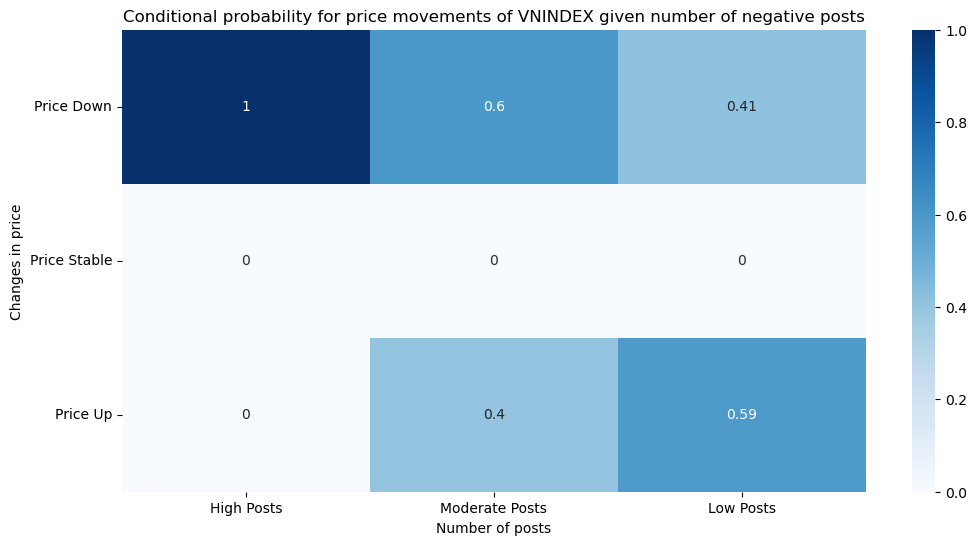

In [47]:
plot_probability_heatmap(P_VNINDEX_number_negative_posts, 'Conditional probability for price movements of VNINDEX given number of negative posts')

Về số lượng bài viết tiêu cực, không ngoài dự đoán, khi số lượng bài viết tiêu cực tăng cao 100% giá cổ phiếu của mã giảm, ngược lại khi số lượng bài viết tiêu cực thấp, 60% giá trị cổ phiếu sẽ tăng. 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22376\3937639811.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix = matrix_df.fillna(0).values  # .fillna(0) is used to replace any missing values with 0


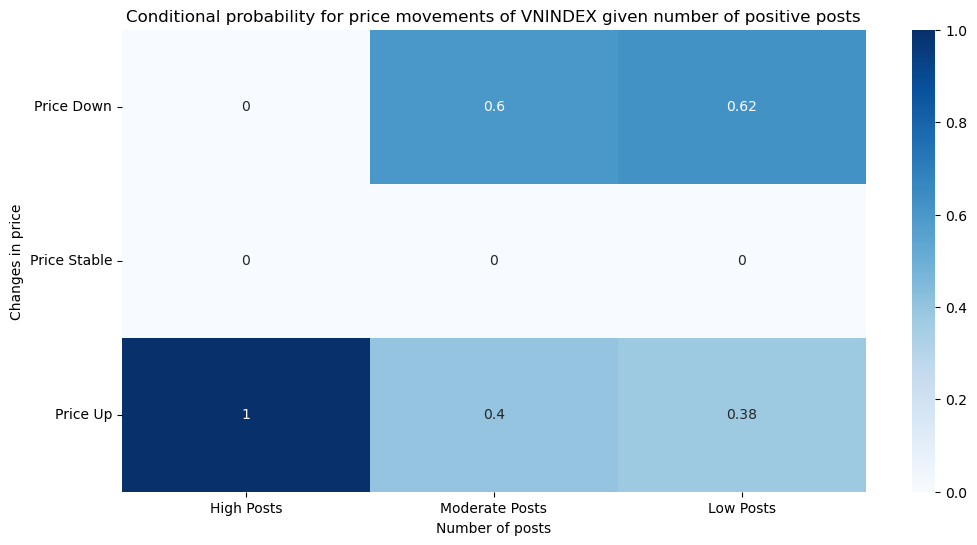

In [48]:
plot_probability_heatmap(P_VNINDEX_number_positive_posts, 'Conditional probability for price movements of VNINDEX given number of positive posts')

Điều tương tự cũng áp dụng với các bài viết tích cực, giá trị cổ phiếu 100% tăng khi số lượng bài viết cao và 62 giảm khi số lượng bài viết thấp.

Từ cả 3 biểu đồ, ta có thể đưa ra nhận xét rằng, các xu hướng trên đều đã được dự đoán trước. Ngoài ra, xác suất để giá trị cổ phiếu duy trì ổn định là 0 trong tất cả các tiêu chí về số lượng bài viết, điều này cho thấy sự bất ổn, luôn biến động của của giá trị cổ phiếu VNINDEX.

#### 2.1.4 Calculating and Storing Symbol Probabilities as Matrices

Tương tự như các tính toán trên với mã cổ phiếu VNINDEX, ta tiếp tục thực hiện tính toán với tất cả các cổ phiếU nói chung. Để thực hiện được điều này, trước hết ta biến đổi tất cả các kết quả của hàm probability_bayesian_inference_posts() của từng mã chứng khoán sang dạng ma trận.

In [49]:
warnings.filterwarnings("ignore")
symbol_probabilities_matrices = {}

# Loop through each symbol in valid_symbols
for symbol in valid_symbols:
    temp_df = symbols_posts_data[symbol]
    
    # Assuming probability_bayesian_inference_posts expects arrays as inputs
    dates = temp_df['date'].values  # Convert Series to numpy array
    daily_changes = temp_df['daily_change'].values
    number_of_posts = temp_df['number_of_posts'].values
    
    # Pass the arrays to the function and store the result
    _, symbol_probabilities_matrices[symbol] = dict_to_matrix(probability_bayesian_inference_posts(dates, daily_changes, number_of_posts))

# check if matrix are correctly converted
print(symbol_probabilities_matrices['VNINDEX'])



[[0.7143 0.75   0.4865]
 [0.     0.     0.    ]
 [0.2857 0.25   0.5135]]


#### 2.1.5: Calculating and Plotting the Averaged Conditional Probability Matrix for Price Movements Based on Posting Activity

Từ các ma trận bên trên, ta thưc hiện tính tổng cho chúng. 
Lưu ý rằng: khi số lương ma trận ít hoặc vừa phải, các phép tính cho ra kết quả có độ chính xác cao(tổng xác suất các trường hợp công lại bằng 1). Tuy nhiên, do số lượng ma trận lơn(trên 1000), việc python tự động làm tròn các con số khiến cho kết quả có độ sai lệch lơn so với kết quả dự tính. Do đó, sau khi tính tổng ma trận xong, tần cân thực hiện thêm bước chuẩn hoá sử dụng hàm normalize_matrix(matrix).

In [50]:
def normalize_matrix(matrix):
    # Calculate the sum of each column
    column_sums = np.sum(matrix, axis=0)
    
    # Avoid division by zero by setting any zero column sums to 1 temporarily
    column_sums[column_sums == 0] = 1
    
    # Normalize each column by dividing by its sum
    normalized_matrix = matrix / column_sums
    
    return normalized_matrix

#### 2.1.6: Illustrate the probability of the changes in price of all symbols based on posting activities using heatmap

In [51]:
bayes_matrices_sum = None 
for matrix_positive in symbol_probabilities_matrices.values():
    if bayes_matrices_sum is None:
        bayes_matrices_sum = matrix_positive 
    else:
        bayes_matrices_sum += matrix_positive 
bayes_matrices_sum /= len(symbol_probabilities_matrices)
bayes_matrices_sum = normalize_matrix(bayes_matrices_sum)
print(bayes_matrices_sum)
    

[[0.31719732 0.59073788 0.33133878]
 [0.27796596 0.13571539 0.37790351]
 [0.40483672 0.27354673 0.29075771]]


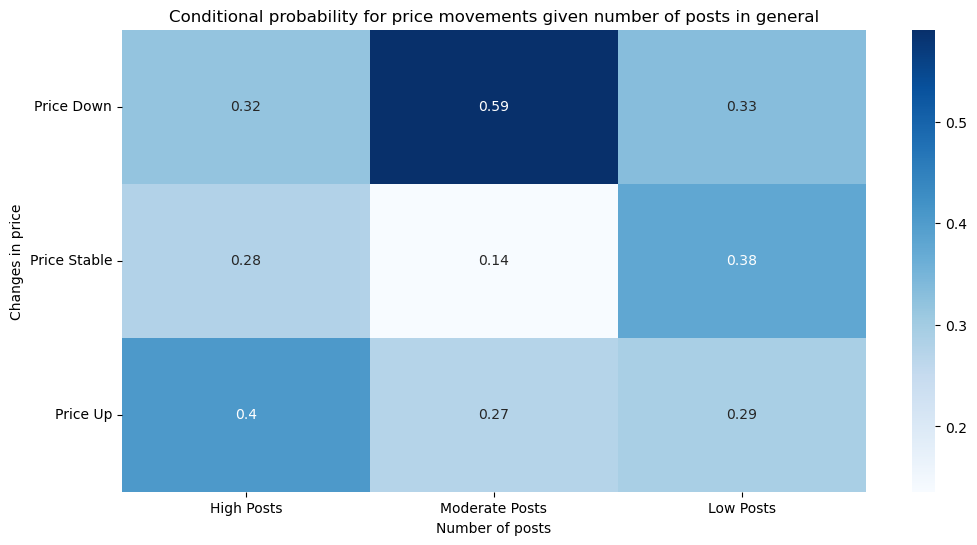

In [52]:
plot_probability_heatmap(bayes_matrices_sum, 'Conditional probability for price movements given number of posts in general')

[[0.32280184 0.66449216 0.33345826]
 [0.20848021 0.09001166 0.37549657]
 [0.46871795 0.24549618 0.29104517]]


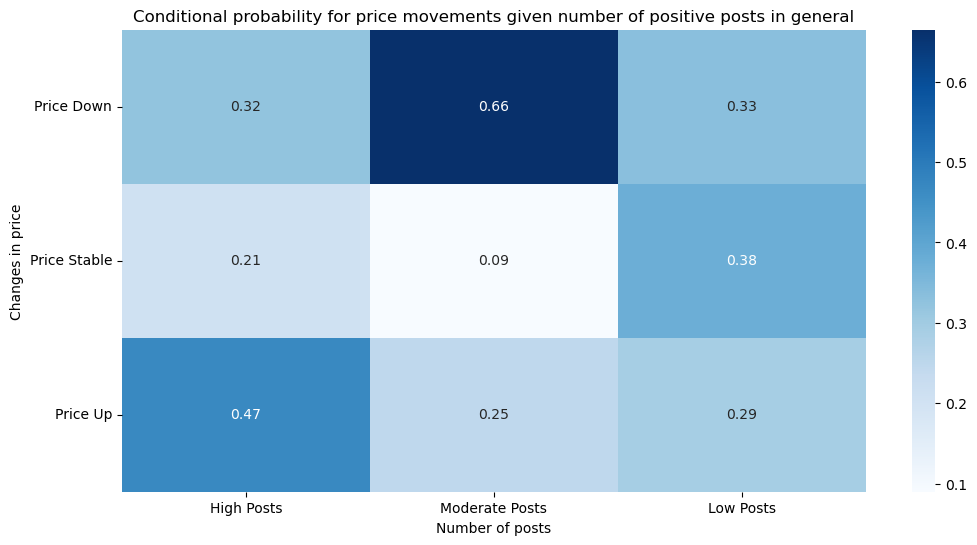

In [53]:
# Loop through each symbol in valid_symbols
for symbol in valid_symbols:
    temp_df = symbols_posts_data[symbol]
    
    # Assuming probability_bayesian_inference_posts expects arrays as inputs
    dates = temp_df['date'].values  # Convert Series to numpy array
    daily_changes = temp_df['daily_change'].values
    number_of_posts = temp_df['number_of_positive_posts'].values
    
    # Pass the arrays to the function and store the result
    _, symbol_probabilities_matrices[symbol] = dict_to_matrix(probability_bayesian_inference_posts(dates, daily_changes, number_of_posts))

warnings.filterwarnings("ignore")

bayes_matrices_sum = None 
for matrix_positive in symbol_probabilities_matrices.values():
    if bayes_matrices_sum is None:
        bayes_matrices_sum = matrix_positive
    else:
        bayes_matrices_sum += matrix_positive
    
bayes_matrices_sum /= len(symbol_probabilities_matrices.values())

bayes_matrices_sum = normalize_matrix(bayes_matrices_sum)
print(bayes_matrices_sum)




plot_probability_heatmap(bayes_matrices_sum, 'Conditional probability for price movements given number of positive posts in general')


[[0.54063487 0.54539218 0.32465996]
 [0.15614346 0.07558657 0.37428606]
 [0.30322167 0.37902125 0.30105398]]


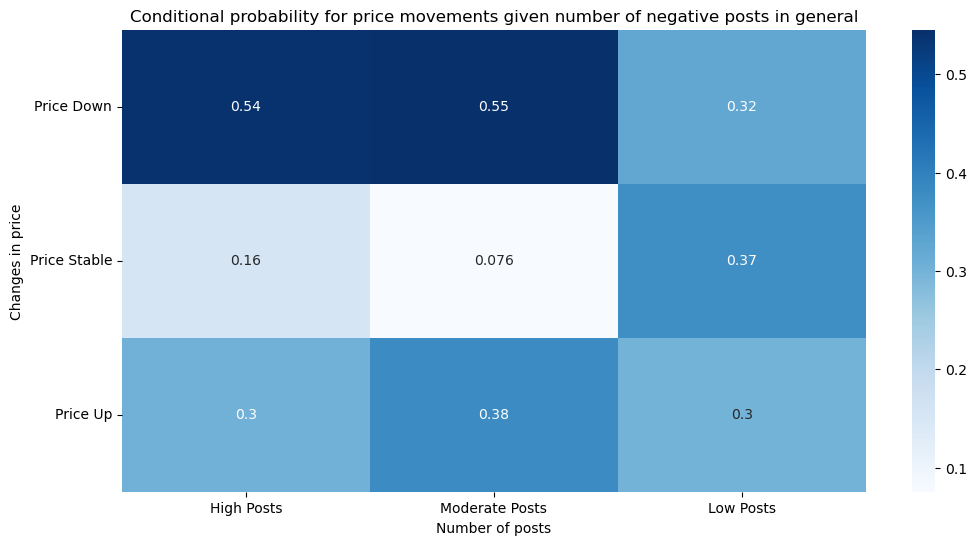

In [54]:
# Loop through each symbol in valid_symbols
for symbol in valid_symbols:
    temp_df = symbols_posts_data[symbol]
    
    # Assuming probability_bayesian_inference_posts expects arrays as inputs
    dates = temp_df['date'].values  # Convert Series to numpy array
    daily_changes = temp_df['daily_change'].values
    number_of_posts = temp_df['number_of_negative_posts'].values
    
    # Pass the arrays to the function and store the result
    _, symbol_probabilities_matrices[symbol] = dict_to_matrix(probability_bayesian_inference_posts(dates, daily_changes, number_of_posts))

warnings.filterwarnings("ignore")

bayes_matrices_sum = None 
for matrix_positive in symbol_probabilities_matrices.values():
    if bayes_matrices_sum is None:
        bayes_matrices_sum = matrix_positive
    else:
        bayes_matrices_sum += matrix_positive
    
bayes_matrices_sum /= len(symbol_probabilities_matrices.values())

bayes_matrices_sum = normalize_matrix(bayes_matrices_sum)
print(bayes_matrices_sum)




plot_probability_heatmap(bayes_matrices_sum, 'Conditional probability for price movements given number of negative posts in general')


Từ 3 biểu đồ heatmap trên, có thể thấy việc gộp chung dữ liệu từ tất cả các mã không phải là một phương án tối ưu, khi mà xác suất để giá trị cổ phiếu tăng, giảm hoặc duy trì ổn đinh đều không quá chắc chắn. Do đó, sẽ tốt hơn nếu ta thực hiện chọn lọc các cổ phiếu có xác suất tăng giảm rõ ràng hơn để tính toán.

#### Nhận xét về phương pháp dự đoán giá cổ phiếu sử dụng đinh luật bayes. Dẫu cho nhiều kết quả khả quan, đặc biêt với những kết quả xác suất từ giá trị cổ phiếU VNINDEX, phương pháp này gần như không có giá trị thực tiễn. Đơn giản bởi vì ta đang dùng số lượng bài đăng để dự đoán giá trị cổ phiếu, tuy nhiên giá trị cổ phiếu có biến động(tăng/giảm) thì số lượng bài đăng mới tăng. Do đó, việc sử dụng phương pháp này trong thực tế để dự đoán biến động giá cổ phiếu có thể dẫn đến các nhận định sai lệch và thiếu chính xác.

### 2.2: Calculating probability using Markov Chains

#### Như đã trình bày về hạn chế về phương pháp dự đoán giá trị cổ phiếu áp dụng định luật bayes, ta sẽ sử dụng một cách tiếp cận khả quan và thực tế hơn-xích Markov. 

#### 2.2.1: Create a function to Aggregate Stock Price and Social Media Sentiment Data by 30-Minute Intervals for Symbol Analysis

Trước tiên ta tạo hàm to_post_analysis_dataframe_time_series(symbol_name), giống với hàm to_post_analysis_dataframe(symbol_name) phía trên, hàm hàm to_post_analysis_dataframe_time_series(symbol_name) kết hợp hai dataframe liên quan đến từng mã chứng khoán lại thành một. Tuy nhiên dataframe kết hợp mới ở đây sẽ không lấy mốc thời gian theo từng ngày, thay vào đó, mà thay vào đó, lấy mốc thời gian dựa trên các đợt giao dịch. Cụ thể, ta thực hiện tính toán trong khoảng thời gian mỗi giao dịch diễn ra(30 phút), có bao nhiêu bài viết được đăng, số lượng bài viết tiêu cực, số lượng bài viết tích cực,...Từ đó ta thực hiện dự đoán xác suất giá cổ phiếu sẽ tăng hay giảm cho lần giao dịch tiếp theo.

In [55]:
import pandas as pd
from dateutil.parser import isoparser
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def to_post_analysis_dataframe_time_series(symbol_name):
    # Load price data for the symbol
    price_data_frame = symbol_price_data_dict[symbol_name]

    # Retrieve social media posts data for the symbol from the symbols_data dictionary
    symbol_posts_data_frame = symbols_data_dict[symbol_name]
    
    # Parse 'time' column in price data frame to datetime format, handling null values
    price_data_frame['time'] = price_data_frame['time'].astype('string')
    price_data_frame['time'] = price_data_frame['time'].apply(
        lambda x: isoparser().isoparse(x) if pd.notnull(x) else pd.NaT
    )
    
    # Round posts' timestamps to the nearest 30 minutes and remove timezone information
    symbol_posts_data_frame['time'] = symbol_posts_data_frame['time'].dt.floor('30T')
    symbol_posts_data_frame['time'] = symbol_posts_data_frame['time'].dt.tz_localize(None)
    
    # Perform a left join on 'time' column to merge price data with social media posts data
    merge_df = pd.merge(price_data_frame, symbol_posts_data_frame, on='time', how='left')
    
    # Group by 'time' and aggregate key statistics for both price and social media data
    if 'volume' in merge_df:
        result_df = merge_df.groupby('time').agg(
            number_of_posts=('postID', 'count'),  # Count of total posts
            number_positive_posts=('sentiment', lambda x: (x == 'positive').sum()),  # Positive posts count
            number_of_negative_posts=('sentiment', lambda x: (x == 'negative').sum()),  # Negative posts count
            number_of_netral_posts=('sentiment', lambda x: (x == 'neutral').sum()),  # Neutral posts count
            average_price_mentioned=('price', 'mean'),  # Average price mentioned in posts
            open=('open', 'first'),  # Opening price
            high=('high', 'first'),  # High price
            low=('low', 'first'),  # Low price
            close=('close', 'first'),  # Closing price
            volume=('volume', 'first'),  # Volume
            average_post_length=('word_count', 'mean'),  # Average word count in posts
        ).reset_index()
    else:
        result_df = merge_df.groupby('time').agg(
            number_of_posts=('postID', 'count'),  # Count of total posts
            number_positive_posts=('sentiment', lambda x: (x == 'positive').sum()),  # Positive posts count
            number_of_negative_posts=('sentiment', lambda x: (x == 'negative').sum()),  # Negative posts count
            number_of_netral_posts=('sentiment', lambda x: (x == 'neutral').sum()),  # Neutral posts count
            average_price_mentioned=('price', 'mean'),  # Average price mentioned in posts
            open=('open', 'first'),  # Opening price
            high=('high', 'first'),  # High price
            low=('low', 'first'),  # Low price
            close=('close', 'first'),  # Closing price
            average_post_length=('word_count', 'mean'),  # Average word count in posts
        ).reset_index()
        
    
    
    
    # Round all numeric columns to 2 decimal places for readability
    result_df = result_df.round(2)
    
    # Replace any remaining NaN values with 0
    result_df.fillna(0, inplace=True)

    return result_df


#### 2.2.2: Categorizing Posts and Analyzing Price State Transitions



Ta thực hiện phân loại bài viết theo mức độ hoạt động, xác định trạng thái giá cổ phiếu dựa trên biến động, tạo ma trận chuyển trạng thái để phân tích sự thay đổi và trực quan hóa kết quả bằng biểu đồ nhiệt.

Để tránh lặp lại code cho các tính toán và thông kê tương tự nhau, ta xây dựng các hàm chức năng.

Thức nhất, hàm categorize_posts(posts, mean_posts, std_posts) phân loại số lượng bài viết cao, trung bình, hoặc thấp dựa trên độ lệch chuẩn so với số lượng bài viết trung bình.

Thứ hai, hàm define_state(change, threshold=0.01) Xác định trạng thái giá cổ phiếu là Tăng giá, Giảm giá, hoặc Ổn định giá dựa trên ngưỡng biến động 1%.

Thứ ba, hàm df_to_transitions_matrix(df):
Kiểm tra tính hợp lệ của df dưới dạng DataFrame và tính toán giá trị trung bình cùng độ lệch chuẩn của số lượng bài viết.
Tính toán phần trăm thay đổi giá cổ phiếu hàng ngày.
Phân loại số lượng bài viết và gán trạng thái giá cổ phiếu.
Tạo ba ma trận chuyển trạng thái: ma trận chuyển trạng thái tổng thể, ma trận chuyển trạng thái bài viết tích cực và ma trận chuyển trạng thái bài viết tiêu cực.

Cuối cùng, hàm heatmap_illustration(matrix, title, xlabel, ylabel) thực hiện trực quan hóa các ma trận chuyển trạng thái dưới dạng biểu đồ nhiệt với chú thích về xác suất.






In [56]:
# Categorize the number of posts based on standard deviation from the mean
def categorize_posts(posts, mean_posts, std_posts):
    # If posts exceed mean + std, categorize as 'high'
    if posts > mean_posts + std_posts:
        return 'high number of posts'
    # If posts are within one std deviation from the mean, categorize as 'moderate'
    if abs(posts - mean_posts) <= std_posts:
        return 'moderate number of posts'
    # Otherwise, categorize as 'low'
    return 'low number of posts'

# Define state based on the change in price and a given threshold
def define_state(change, threshold=0.01):
    # If change exceeds threshold, label as 'Price Up'
    if change > threshold:
        return 'Price Up'
    # If change is below negative threshold, label as 'Price Down'
    if change < -threshold:
        return 'Price Down'
    # Otherwise, label as 'Price Stable'
    return 'Price Stable'

# Convert the DataFrame into a transitions matrix for state transitions
def df_to_transitions_matrix(df):
    # Check if df is a DataFrame, return None if not
    if not isinstance(df, pd.DataFrame):
        return None
    
    # Calculate mean and std dev for post counts
    mean_posts = df['number_of_posts'].mean()
    std_posts = df['number_of_posts'].std()
    
    # Calculate daily percentage price change and fill NaN values with 0
    df['pecentage_price_change'] = df['close'].pct_change() * 100
    df['pecentage_price_change'].fillna(0, inplace=True)

    # Categorize post counts and define state based on price change
    df['post_category'] = df['number_of_posts'].apply(lambda x: categorize_posts(x, mean_posts, std_posts))
    df['state'] = df['pecentage_price_change'].apply(define_state)
    
    # Shift 'state' to get 'next_state' column, drop rows with NaN in 'next_state'
    df['next_state'] = df['state'].shift(-1)
    df.dropna(subset=['next_state'], inplace=True)
    
    # Update post category columns based on recalculated mean and std dev for consistency
    mean_posts = df['number_of_posts'].mean()
    std_posts = df['number_of_posts'].std()
    df['post_category'] = df['number_of_posts'].apply(lambda x: categorize_posts(x, mean_posts, std_posts))
    
    # Calculate mean and std dev for positive and negative posts and categorize accordingly
    std_positive_posts = df['number_positive_posts'].std()
    mean_positive_posts = df['number_positive_posts'].mean()
    df['Positive_post_category'] = df['number_positive_posts'].apply(lambda x: categorize_posts(x, mean_positive_posts, std_positive_posts))
    
    std_negative_posts = df['number_of_negative_posts'].std()
    mean_negative_posts = df['number_of_negative_posts'].mean()
    df['Negative_post_category'] = df['number_of_negative_posts'].apply(lambda x: categorize_posts(x, mean_negative_posts, std_negative_posts))
    
    # Create a transition matrix based on current and next states
    transition_counts = pd.crosstab(df['state'], df['next_state'])
    transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)
    
    # Transition matrix for number of posts based on current state and positive post category
    transition_posts_count = pd.crosstab(
        [df['state'], df['post_category']],
        df['next_state']
    )
    transition_posts_matrix = transition_posts_count.div(transition_posts_count.sum(axis = 1), axis = 0)
    
    # Transition matrix for positive posts based on current state and positive post category
    transition_positive_posts_count = pd.crosstab(
        [df['state'], df['Positive_post_category']],
        df['next_state']
    )
    transition_positive_posts_matrix = transition_positive_posts_count.div(transition_positive_posts_count.sum(axis=1), axis=0)
    
    # Transition matrix for negative posts based on current state and negative post category
    transition_negative_posts_count = pd.crosstab(
        [df['state'], df['Negative_post_category']],
        df['next_state']
    )
    transition_negative_posts_matrix = transition_negative_posts_count.div(transition_negative_posts_count.sum(axis=1), axis=0)
    
    transition_matrix.fillna(0, inplace = True)
    transition_posts_matrix.fillna(0 ,inplace = True)
    transition_negative_posts_matrix.fillna(0, inplace = True)
    transition_positive_posts_matrix.fillna(0, inplace = True)
    # Return the three transition matrices
    
    
    return transition_matrix, transition_posts_matrix, transition_negative_posts_matrix, transition_positive_posts_matrix

# Visualize the transition matrix using a heatmap
def heatmap_illustration(matrix, title, xlabel, ylabel):
    """
    Visualize a transition matrix using a heatmap with a color map emphasizing
    small values as bright and large values as dark.
    
    Parameters:
        matrix (DataFrame or ndarray): Transition matrix to visualize.
        title (str): Title of the heatmap.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    plt.figure(figsize=(14, 8))
    
    # Create a heatmap with sequential colormap (e.g., 'Blues') for brightness control
    sns.heatmap(matrix, 
                annot=True, 
                cbar_kws={'label': 'Transition Probability'}, 
                cmap='Reds',  # Use 'Blues' for small values brighter and large values darker
                fmt='.2f',     # Format annotations to 2 decimal places
                vmin=0,        # Minimum value for color scale
                vmax=1)        # Maximum value for color scale
    
    # Set title and labels for axes
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.yticks(rotation=0)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


In [57]:
# check if function work properly
VNINDEX_df = to_post_analysis_dataframe_time_series('VNINDEX')
VNINDEX_df.head(1)

,time,number_of_posts,number_positive_posts,number_of_negative_posts,number_of_netral_posts,average_price_mentioned,open,high,low,close,volume,average_post_length
0,2024-09-04 09:00:00,0,0,0,0,0.0,1273.86,1273.86,1268.53,1271.34,76561000,0.0


In [58]:
transition_matrix, transition_posts_matrix, transition_negative_posts_matrix, transition_positive_posts_matrix = df_to_transitions_matrix(VNINDEX_df)

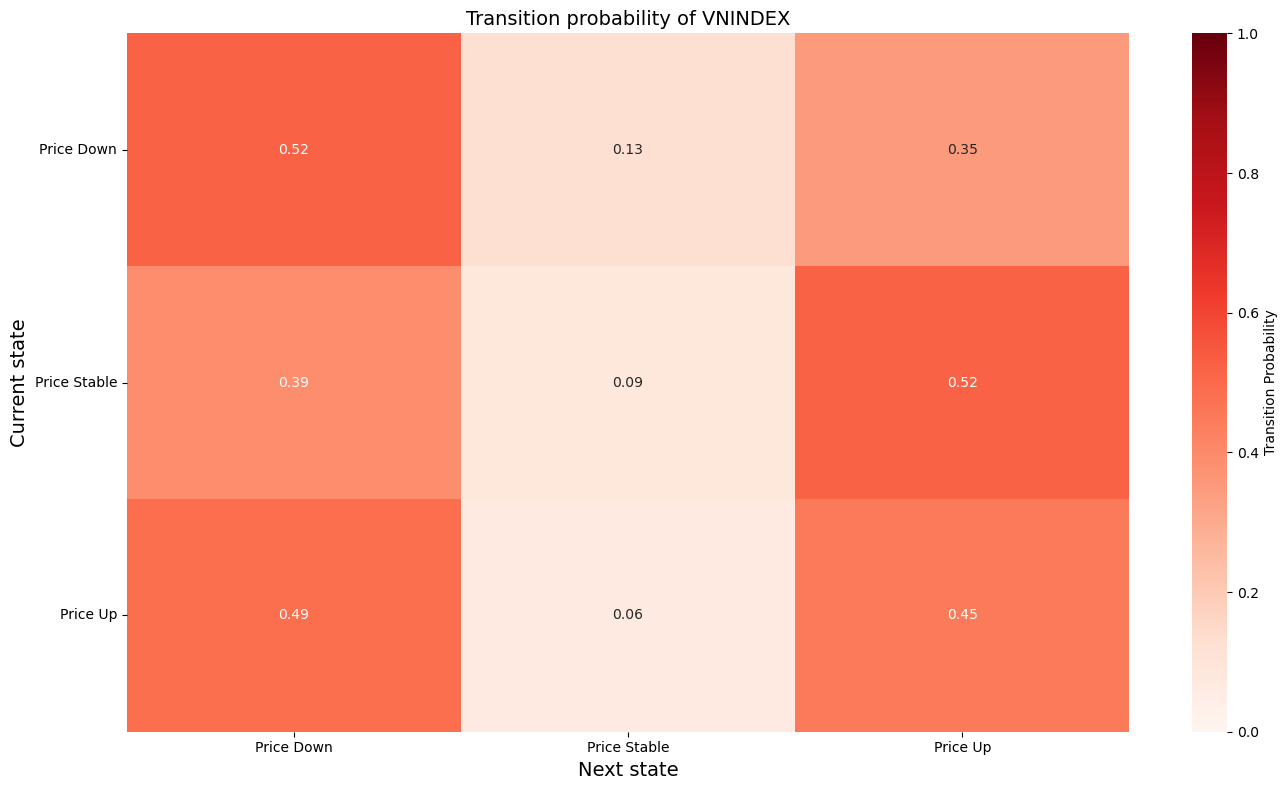

In [59]:
heatmap_illustration(transition_matrix, 'Transition probability of VNINDEX', 'Next state', 'Current state')

Nhận xét biểu đồ: Xác suất để giá trị cổ phiếu VNINDEX chuyển từ trạng thái hiện tại sang trạng thái tăng hoặc giảm nhìn chung đều không chắc chắn, xoay quanh 50%. Dễ hiểu, do ta chưa xét các yếU tố nào khác mà chỉ dựa hoàn toàn vào sự thay đổi của giá mã cổ phiếu theo theo thời gian

In [60]:
transition_posts_matrix

next_state                             Price Down  Price Stable  Price Up
state        post_category                                               
Price Down   high number of posts        0.714286      0.028571  0.257143
             low number of posts         0.583333      0.208333  0.208333
             moderate number of posts    0.473373      0.136095  0.390533
Price Stable high number of posts        0.500000      0.000000  0.500000
             low number of posts         0.428571      0.047619  0.523810
             moderate number of posts    0.347826      0.130435  0.521739
Price Up     high number of posts        0.500000      0.100000  0.400000
             low number of posts         0.714286      0.000000  0.285714
             moderate number of posts    0.464516      0.064516  0.470968

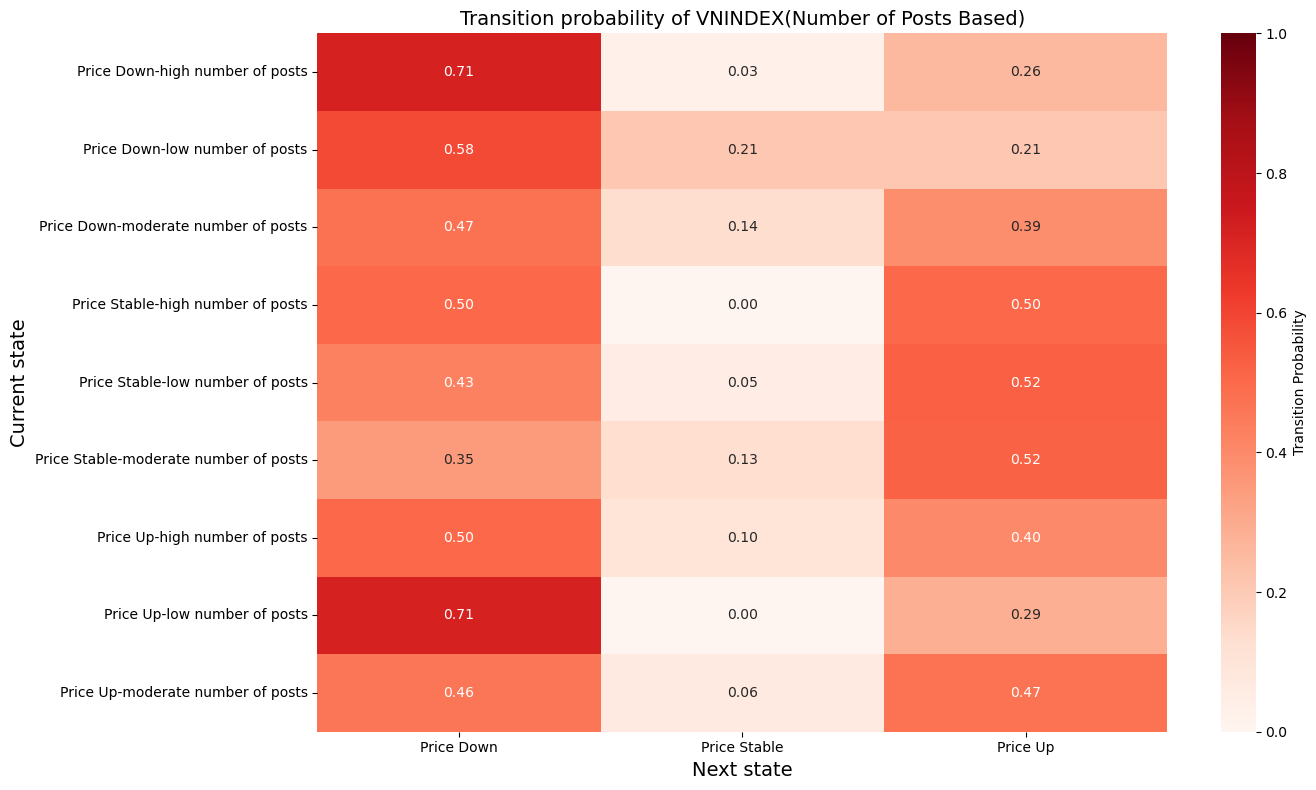

In [61]:
heatmap_illustration(transition_posts_matrix, 'Transition probability of VNINDEX(Number of Posts Based)', 'Next state', 'Current state')

Khắc phục hạn chế từ kết quả ở biểU đồ trên. Sau khi thêm vào số lượng các bài đăng trong từng khoảng thời gian vào một trong các yếu tố thống kê, ta thu được nhiều kết quả khả quan hơn. Cụ thể nếu ở đợt giao dịch hiện tại giá trị cổ phiếu giảm và số lượng bài viết cao, thì 100% ở lần giao dịch tiếp theo 71% giá trị cổ phiếu sẽ giảm. Hay giá trị cổ phiếu có khả năng giảm khoảng 71% nếu ở đợt giao dịch hiện tại giá trị cổ phiếu tăng, số lượng bài viết thâp.

In [62]:
transition_positive_posts_matrix

next_state                             Price Down  Price Stable  Price Up
state        Positive_post_category                                      
Price Down   high number of posts        0.560000      0.040000  0.400000
             low number of posts         0.600000      0.166667  0.233333
             moderate number of posts    0.502890      0.132948  0.364162
Price Stable high number of posts        0.000000      0.000000  1.000000
             low number of posts         0.428571      0.071429  0.500000
             moderate number of posts    0.400000      0.100000  0.500000
Price Up     high number of posts        0.414634      0.048780  0.536585
             low number of posts         0.611111      0.000000  0.388889
             moderate number of posts    0.492308      0.076923  0.430769

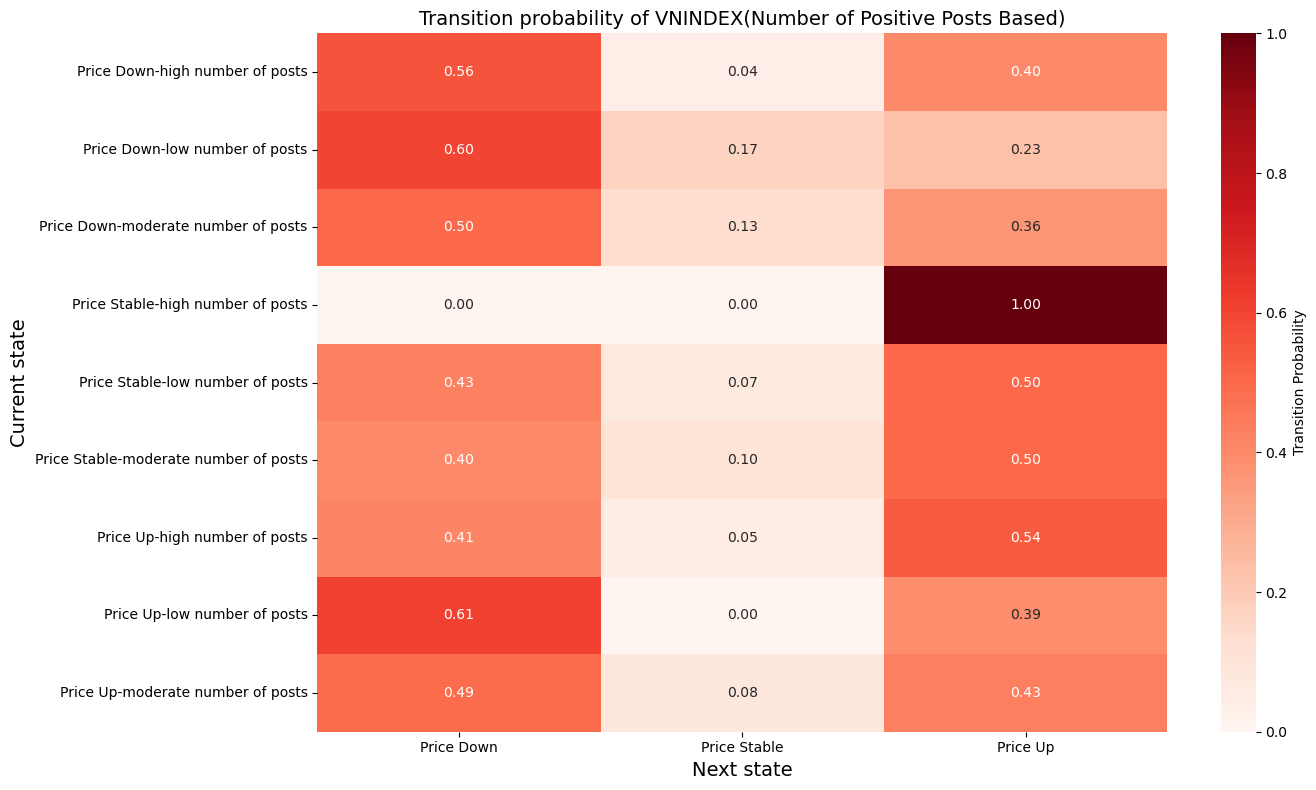

In [63]:
heatmap_illustration(transition_positive_posts_matrix, 'Transition probability of VNINDEX(Number of Positive Posts Based)', 'Next state', 'Current state')

Tương tự như bảng heatmap phía trên, khi số lượng bài đăng tích cực tăng cao, mà giá trị cổ phiếu lại duy trì ở mức ổn định, 100% giá trị cổ phiếu sẽ tăng ở lượt giao dịch tiếp theo. Tuy vậy, trong hâu hết các trường hợp, giá trị cổ phiếu có khả năng giảm nhiềU hơn tăng.

In [64]:
transition_negative_posts_matrix

next_state                             Price Down  Price Stable  Price Up
state        Negative_post_category                                      
Price Down   high number of posts        0.620000      0.100000  0.280000
             low number of posts         0.653846      0.192308  0.153846
             moderate number of posts    0.467105      0.125000  0.407895
Price Stable high number of posts        0.500000      0.000000  0.500000
             low number of posts         0.416667      0.083333  0.500000
             moderate number of posts    0.375000      0.093750  0.531250
Price Up     high number of posts        0.625000      0.125000  0.250000
             low number of posts         0.611111      0.000000  0.388889
             moderate number of posts    0.458065      0.064516  0.477419

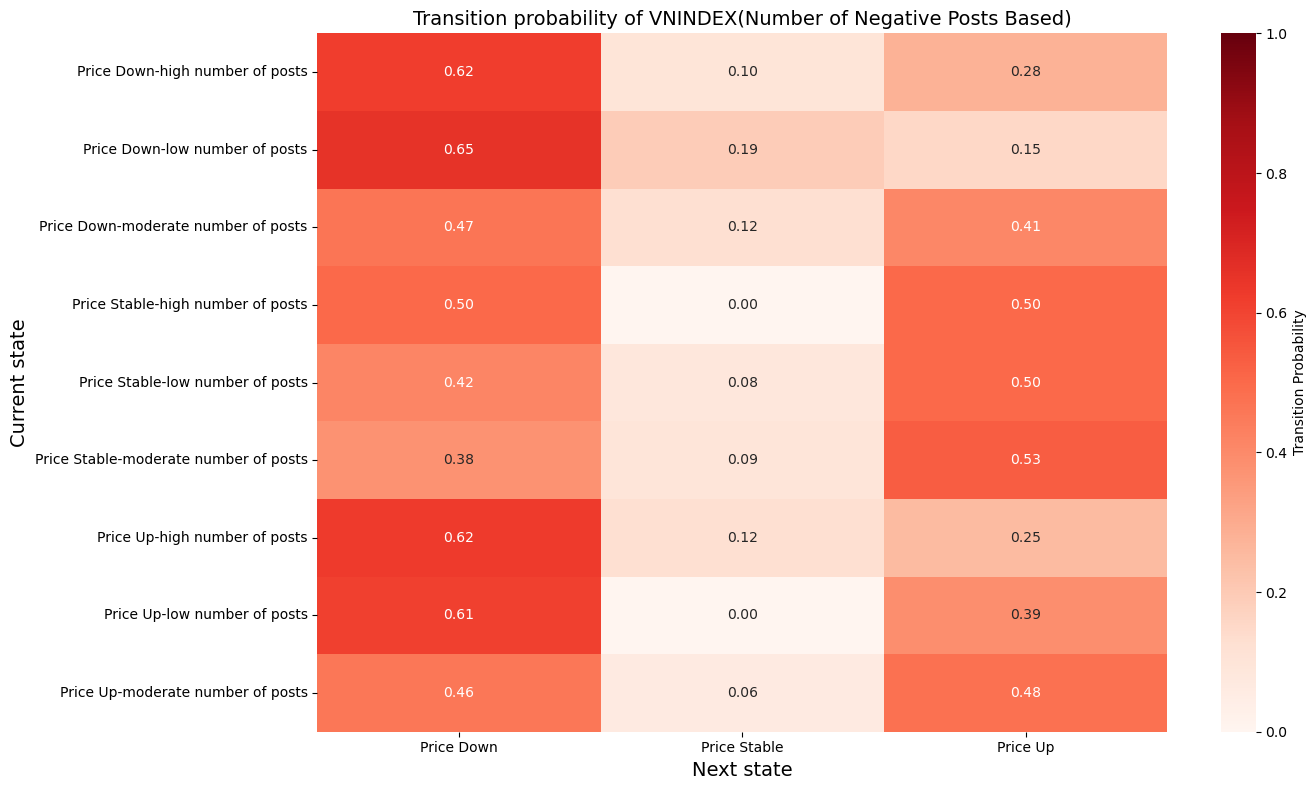

In [65]:
heatmap_illustration(transition_negative_posts_matrix, 'Transition probability of VNINDEX(Number of Negative Posts Based)', 'Next state', 'Current state')

Khác với khi sử dụng số lượng bài viết nói chung và số lượng bài viết tích cực, khi dựa vào số bài viết tiêu cực, ta thấy xác giá trị cố phiếu giảm chỉ cao nhất là 65%. Điều này trái với dự đoán rằng, khi số lượng bìa viết tiêu cực cao, xác suất lượt giao dịch tiếp theo giá giảm cũng sẽ cao. 

Tương tự xác suất chuyển đổi trạng thái sang giá trị cổ phiếu tăng cũng chỉ cao nhất là 53% và thấp nhất là 25%.

Nhìn số lượng bài viết tiêu cực không thể hiện quá nhiều về khả năng tăng hoặc giảm của mã cố phiếu sau này.

#### Nhận xét chung: Xích-Markov là một phương pháp tính toán hợp lý hơn so với định lý Bayes trong việc dự đoán sự tăng giảm của giá trị cổ phiếu. Tuy vậy trong trường hợp giá trị cổ phiếu 100% sẽ tăng duy nhất ở trên, trường hợp tại thời điểm giao dịch đó(current state) đều cực kỳ khó xảy ra: Giá duy trì ổn định nhưng số lượng bài viết lại cao. Nếu phải dựa trên những current state khác, khả năng chính xác của dự đoán là khoảng 60% cho việc giá cổ phiếU sẽ giảm và chỉ xấp xỉ 50% cho việc giá trị cổ phiếu sẽ tăng, do những dự đoán này chưa có tính chắc chắn cao.

#### 3.2.1: Predicting changes in price using Markov chain(with new dataframe)

Ta lưu dataframe cho mỗi mã chứng khoán ở trong dictionary symbols_data_dict, nhưng là này sử dụng dataframe new_posts_df thay vì posts_df như lần trước.

In [66]:
import pandas as pd
new_posts_df = pd.read_csv('new_posts_df.csv')
new_posts_df['date'] = new_posts_df['date'].apply(lambda x: isoparser().isoparse(x) if pd.notnull(x) else pd.NaT)
# rename the column date to time
new_posts_df.rename(columns = {'date': 'time'}, inplace = True)
new_posts_df['date'] = new_posts_df['time'].dt.date
new_posts_df.head(2)

,postID,originalContent,time,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,date
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,NaN,negative,1,0,NaN,"[{'symb': '^DJI', 'price': 43496.43}]",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,2024-11-06
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,NaN,negative,0,0,NaN,[],Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,2024-11-06


In [67]:

new_posts_df['taggedSymbols'] = new_posts_df['taggedSymbols'].astype(str)
new_posts_df['taggedSymbols'] = new_posts_df['taggedSymbols'].apply(json_to_dict)
new_posts_df = new_posts_df.explode('taggedSymbols')

new_posts_df['price'] = new_posts_df['taggedSymbols'].apply(extract_price)
new_posts_df['symbol'] = new_posts_df['taggedSymbols'].apply(extract_symbol)

new_posts_df['word_count'] = new_posts_df['originalContent'].apply(lambda x: len(x.split()))
new_posts_df['hour'] = new_posts_df['time'].dt.hour

new_posts_df.head(2)

,postID,originalContent,time,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,date,price,symbol,word_count,hour
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,NaN,negative,1,0,NaN,"{'symb': '^DJI', 'price': 43496.43}",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,2024-11-06,43496.43,^DJI,2,21
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,NaN,negative,0,0,NaN,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,2024-11-06,NaN,None,15,21


In [68]:
symbol_groups = new_posts_df.groupby('symbol')
symbols_data_dict = {symbol : data for symbol, data in symbol_groups}

# check if data is store properly
symbols_data_dict['VNINDEX'].head(2)

,postID,originalContent,time,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,date,price,symbol,word_count,hour
3,29104021,Má đáng full tiền...đau,2024-11-06 21:38:52.277000+07:00,NaN,negative,0,1,NaN,"{'symb': 'VNINDEX', 'price': 1261.28}",Duc Nguyen,225659c6-cf18-4e93-aa39-a294bae5b784,1,1,2024-11-06,1261.28,VNINDEX,4,21
5,29104018,Lãi lollll cổ phiếu Tesla kìa ! Vnindex tăng 1...,2024-11-06 21:38:48.120000+07:00,NaN,positive,1,2,NaN,"{'symb': 'VNINDEX', 'price': 1261.28}",Tư Bản Mẽo,eef9912f-f5eb-4f32-8cc7-71a214b7d02a,0,2,2024-11-06,1261.28,VNINDEX,18,21


In [69]:
VNINDEX_analyse = to_post_analysis_dataframe_time_series('VNINDEX')
transition_matrix, transition_posts_matrix, transition_negative_posts_matrix, transition_positive_posts_matrix = df_to_transitions_matrix(VNINDEX_analyse)

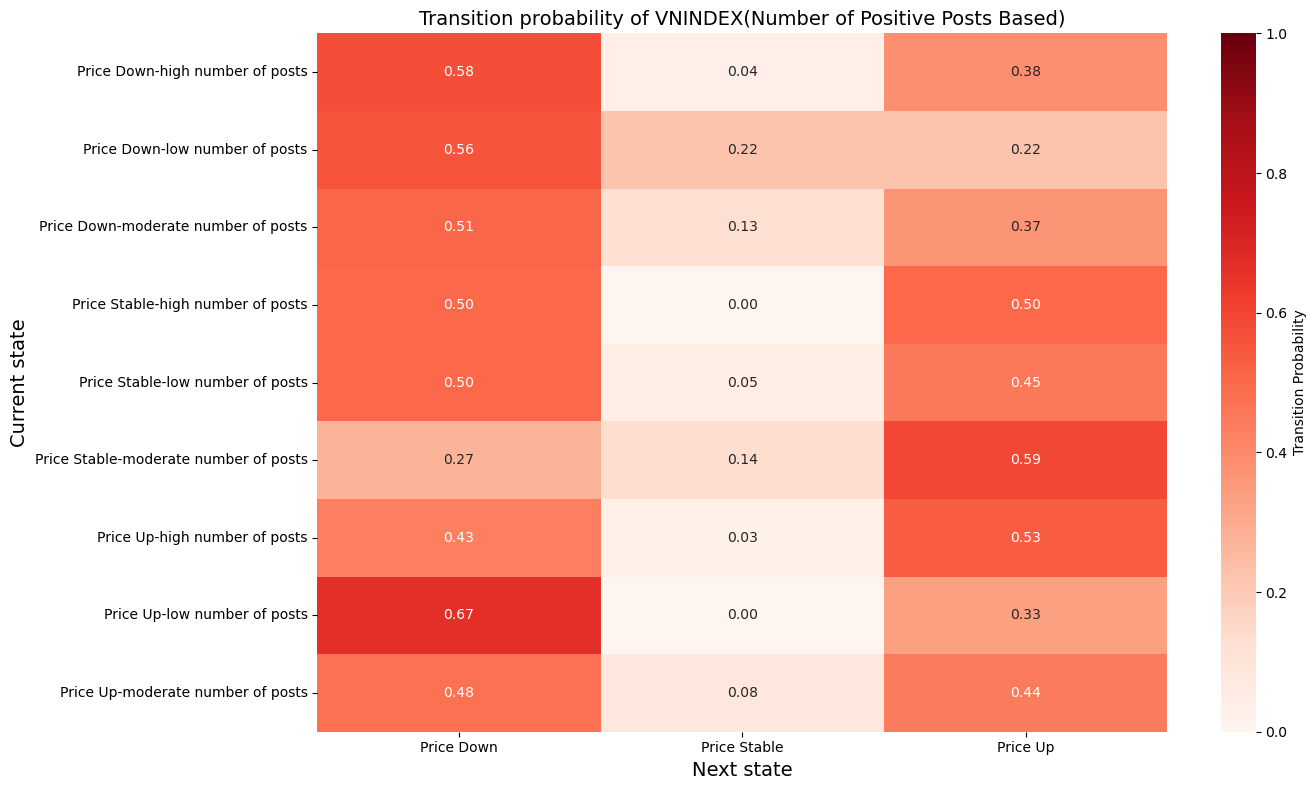

In [70]:
heatmap_illustration(transition_positive_posts_matrix, 'Transition probability of VNINDEX(Number of Positive Posts Based)', 'Next state', 'Current state')


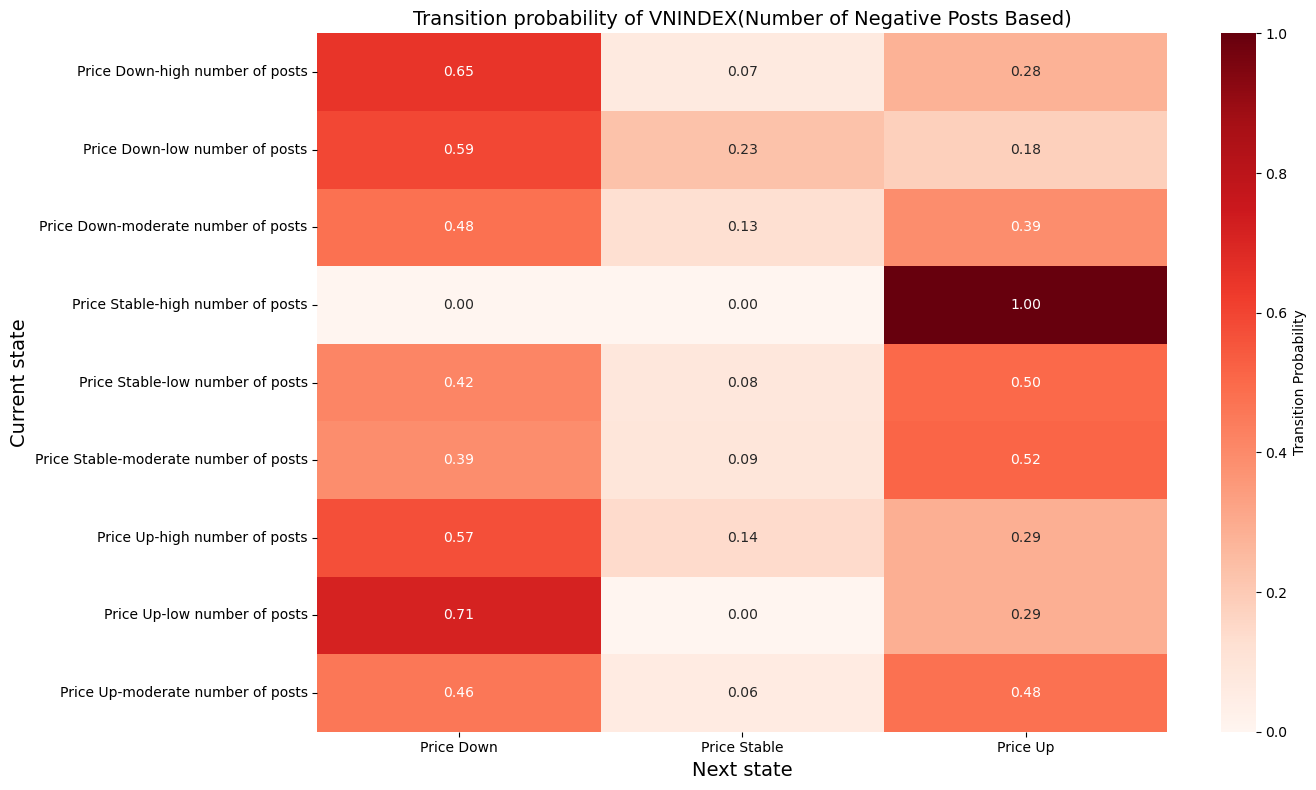

In [71]:
heatmap_illustration(transition_negative_posts_matrix, 'Transition probability of VNINDEX(Number of Negative Posts Based)', 'Next state', 'Current state')

Nhận xét:

Trái với kỳ vọng, dù đã sử dụng dataframe mới với việc phân loại bài đăng tiêu cực và tích cực tốt hơn, kết quả thu được vẫn chưa đạt mức khả quan. Mặc dù độ chính xác trong dự đoán giá tăng/giảm ở một số điều kiện có cải thiện nhẹ, sự cải thiện này không đáng kể.

Ngoài ra, trong cả hai bảng ma trận, xác suất dự đoán giá giảm nhìn chung vẫn cao hơn đáng kể so với xác suất dự đoán giá tăng. Điều này có thể phản ánh một số yếu tố, chẳng hạn như tâm lý nhà đầu tư thường bị ảnh hưởng nhiều hơn bởi các bài đăng tiêu cực hoặc dữ liệu chưa đủ đa dạng để thể hiện toàn diện xu hướng thị trường.

#### 3.2.2: Predicting changes in price of multiple symbols using Markov chain(with new dataframe)

Để khắc phục hạn chế trong hai bảng dự đoán giá cổ phiếu VNINDEX đã nêu, ta đề xuất áp dụng chiến thuật mới bằng cách tính toán xác suất chuyển đổi trên nhiều mã chứng khoán khác nhau. Việc này giúp tăng cường sự đa dạng của dữ liệu, giảm thiểu rủi ro sai lệch và thua lỗ.

Cụ thể, với chiến lược này, thay vì tập trung vào một mã chứng khoán đơn lẻ, ta dựa vào xác suất dự đoán đúng trên toàn bộ danh mục. Do đó, chỉ cần xác suất dự đoán trung bình đạt tối thiểu trên 50%, chiến thuật sẽ có khả năng sinh lợi trong dài hạn.

In [72]:
# Lists to store symbols that meet specific transition conditions
optimized_posts_symbols_list = []
optimized_positive_posts_symbols_list = []
optimized_negative_posts_symbols_list = []

# Initialize dataframes to store cumulative transition matrices for all symbols
markov_post_matrices_sum = pd.DataFrame(0, index=transition_posts_matrix.index, columns=transition_posts_matrix.columns)
markov_negative_posts_matrices_sum = pd.DataFrame(0, index=transition_negative_posts_matrix.index, columns=transition_negative_posts_matrix.columns)
markov_positive_posts_matrices_sum = pd.DataFrame(0, index=transition_positive_posts_matrix.index, columns=transition_positive_posts_matrix.columns)

# Iterate over all valid symbols
for symbol in valid_symbols:
    # Convert the symbol data into a time-series dataframe suitable for analysis
    symbol_df = to_post_analysis_dataframe_time_series(symbol)
    
    # Skip symbols with insufficient data (less than 100 rows)
    if len(symbol_df) <50:
        continue
    
    # Generate transition matrices for posts, negative posts, and positive posts
    _, transition_posts_matrix_temp, transition_negative_posts_matrix_temp, transition_positive_posts_matrix_temp = df_to_transitions_matrix(symbol_df)
    
    # Reindex temporary transition matrices to match the structure of the main matrices and fill missing values with 0
    transition_posts_matrix_temp = transition_posts_matrix_temp.reindex_like(transition_posts_matrix).fillna(0)
    transition_negative_posts_matrix_temp = transition_negative_posts_matrix_temp.reindex_like(transition_negative_posts_matrix).fillna(0)
    transition_positive_posts_matrix_temp = transition_positive_posts_matrix_temp.reindex_like(transition_positive_posts_matrix).fillna(0)
    
    # Check if any value in the 'Price Up' column of the post transition matrix exceeds 0.7
    if (transition_posts_matrix_temp['Price Up'] > 0.7).any():
        # Add the matrix to the cumulative sum
        markov_post_matrices_sum += transition_posts_matrix_temp
        # Add the symbol to the list of optimized symbols
        optimized_posts_symbols_list.append(symbol)
    
    # Check if any value in the 'Price Up' column of the negative post transition matrix exceeds 0.6
    if (transition_negative_posts_matrix_temp['Price Up'] > 0.6).any():
        # Add the matrix to the cumulative sum
        markov_negative_posts_matrices_sum += transition_negative_posts_matrix_temp
        # Add the symbol to the list of optimized symbols
        optimized_negative_posts_symbols_list.append(symbol)
    
    # Check if any value in the 'Price Up' column of the positive post transition matrix exceeds 0.7
    if (transition_positive_posts_matrix_temp['Price Up'] > 0.7).any():
        # Add the matrix to the cumulative sum
        markov_positive_posts_matrices_sum += transition_positive_posts_matrix_temp
        # Add the symbol to the list of optimized symbols
        optimized_positive_posts_symbols_list.append(symbol)


Ta khởi tạo danh sách và ma trận:

Tạo các danh sách để lưu trữ các mã chứng khoán thỏa mãn các điều kiện khác nhau (posts, negative posts, positive posts).
Tạo các ma trận Markov ban đầu với giá trị bằng 0 để lưu tổng các ma trận chuyển đổi.
Lặp qua danh sách các mã chứng khoán hợp lệ:

Chuyển dữ liệu của từng mã chứng khoán thành dạng time-series phù hợp để phân tích.
Bỏ qua các mã có dataframe ít hơn 50 dòng dữ liệu ngắm đảm bảm độ tin cậy của xác suất.
Tính toán ma trận chuyển đổi:

Sinh ra các ma trận chuyển đổi cho toàn bộ bài đăng, bài đăng tiêu cực, và bài đăng tích cực.
Đảm bảo các ma trận này có cùng cấu trúc với ma trận gốc và điền giá trị thiếu bằng 0.
Kiểm tra điều kiện và cập nhật:

Nếu xác suất tăng giá ("Price Up") trong ma trận thỏa mãn các điều kiện (lớn hơn 0.7 hoặc 0.6 tùy loại bài đăng), thì:
Cộng ma trận tương ứng vào ma trận tổng.

Lưu mã chứng khoán thỏa mãn điều kiện vào danh sách tương ứng.

Mục tiêu là tính toán tổng hợp các ma trận chuyển đổi và danh sách các mã chứng khoán có xác suất tăng giá cao, từ đó hỗ trợ phân tích và dự đoán.

In [73]:
markov_posts_matrices_normalized = markov_post_matrices_sum.div(markov_post_matrices_sum.sum(axis = 1), axis = 0).fillna(0)

markov_negative_posts_matrices_normalized = markov_negative_posts_matrices_sum.div(markov_negative_posts_matrices_sum.sum(axis = 1), axis = 0).fillna(0)

markov_positive_posts_matrices_normalized = markov_positive_posts_matrices_sum.div(markov_positive_posts_matrices_sum.sum(axis = 1), axis = 0).fillna(0)



Thực hiện chuẩn hóa ma trận Markov bằng cách đảm bảo rằng tổng xác suất của mỗi hàng (state) trong ma trận bằng 1.

In [74]:
print(f"Number of qualified symbols (all posts): {len(optimized_posts_symbols_list)}")
print("List of qualified symbols (all posts):", optimized_posts_symbols_list)


Number of qualified symbols (all posts): 116
List of qualified symbols (all posts): ['KBC', 'FPT', 'HAH', 'BVS', 'SGR', 'VN30F2M', 'IJC', 'DNW', 'DCL', 'BOT', 'IDI', 'SZL', 'VTB', 'VJC', 'DHT', 'ICT', 'NCS', 'SAS', 'DTK', 'ACG', 'LIG', 'HUB', 'SGT', 'FIC', 'AFX', 'NDN', 'ABI', 'APP', 'VC3', 'SNZ', 'ITD', 'CDN', 'PFL', 'DTL', 'SSB', 'ANT', 'H11', 'POS', 'TIS', 'TSB', 'LPT', 'SGN', 'SDA', 'BCE', 'NSC', 'SVD', 'BMS', 'HDA', 'NXT', 'S99', 'SD9', 'BAX', 'SSG', 'PDC', 'GMH', 'DMC', 'RTB', 'TVD', 'BDG', 'HD2', 'FID', 'ACM', 'GMC', 'TVT', 'PGC', 'PSI', 'CSI', 'SDT', 'HTM', 'TV4', 'LAI', 'APF', 'TOS', 'PNC', 'TIN', 'SEA', 'VCF', 'DSP', 'VPS', 'BMF', 'LIX', 'IVS', 'CAG', 'SFG', 'AAM', 'LAF', 'VNR', 'PAP', 'WCS', 'POT', 'L43', 'HAC', 'ALV', 'BRR', 'MTA', 'BWS', 'PVL', 'SHP', 'SCL', 'VTC', 'HNI', 'PTI', 'ITS', 'DAD', 'DQC', 'CMM', 'FUEDCMID', 'DTI', 'IST', 'BST', 'EBS', 'EID', 'KDM', 'RBC', 'FUEVN100', 'SBV']


Số lượng mã chứng khoán tối ưu cho tính toán dựa trên số lượng bài đăng: 90 mã.
Danh sách mã chứng khoán: Bao gồm các mã như KBC, FPT, HAH, BVS, SGR, và các mã khác.
Có thể nói, đây vẫn là số lượng mã chứng khoán khiêm tốn. Ta có thể khai thác thêm dữ liệu trong tương lai để mở rộng và cải thiện độ chính xác của mô hình.

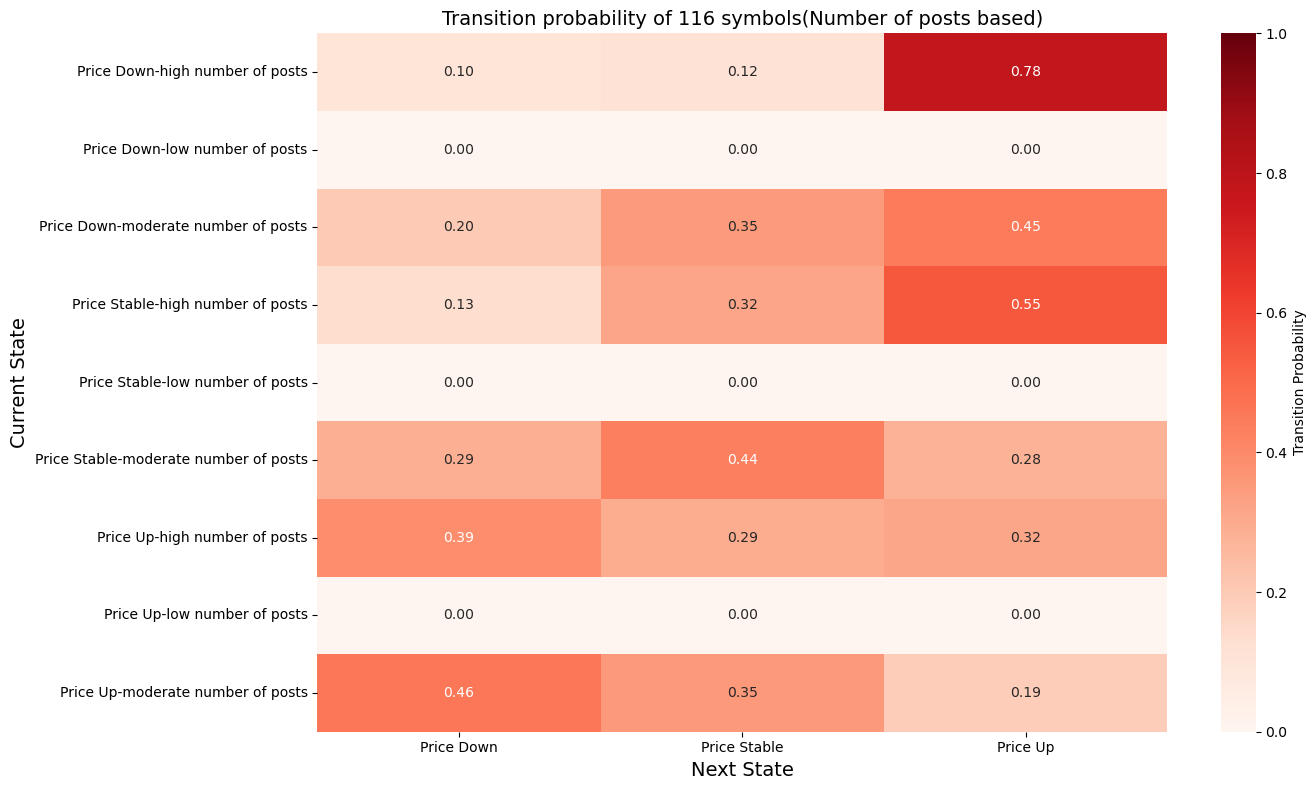

In [75]:
heatmap_illustration(markov_posts_matrices_normalized, f"Transition probability of {len(optimized_posts_symbols_list)} symbols(Number of posts based)", 'Next State', 'Current State')

Từ biểu đồ heatmap, ta thấy 2 trường hợp sẽ tăng giá có xác suất trên 50% bao gồm: Giá hiện tại giảm - só lượng bài đăng lớn(78%) và Giá hiện tại ổn định - Số lượng bài đăng lớn(55%).

Dễ thấy trường hợp đầu tiên có độ chính xác cao hơn đáng kể về cả xác suất tăng giá lẫn khả năng xảy ra. Cụ thể, trường hợp giá duy trì ổn định mà số bài viết lại cao rất hiểm khi xảy ra so với trường giá giảm nên số bài viết cao.

Do đó, nếu có áp dụng mô hình ta sẽ tập chung khai thác vào trường hợp Giá giảm-Số lượng bài viết cao.

In [76]:
print(f"Number of qualified symbols (negative posts): {len(optimized_negative_posts_symbols_list)}")
print("List of qualified symbols (negative posts):", optimized_negative_posts_symbols_list)


Number of qualified symbols (negative posts): 142
List of qualified symbols (negative posts): ['VNINDEX', 'VTP', 'HCM', 'SZC', 'HAH', 'VIC', 'VN30F1M', 'VN30', 'DGW', 'TCM', 'PHR', 'VN30F2M', 'VRE', 'DPM', 'LDG', 'IDJ', 'DNW', 'TLG', 'HHG', 'IDI', 'QNS', 'POM', 'VSI', 'DHT', 'NO1', 'PGT', 'ICT', 'ELC', 'NCS', 'SAS', 'AVC', 'NBC', 'TCI', 'MFS', 'JVC', 'HUB', 'SGT', 'VEF', 'HHP', 'FIC', 'AFX', 'NDN', 'ABC', 'ABI', 'PVI', 'THG', 'AMS', 'CTF', 'KTS', 'TRC', 'MVN', 'KSV', 'E1VFVN30', 'TTH', 'GDT', 'PFL', 'CTP', 'SSB', 'MCO', 'ANT', 'VPI', 'H11', 'PPC', 'FMC', 'TIS', 'OCH', 'SDA', 'BCE', 'BIG', 'SVD', 'PHC', 'CEN', 'VBB', 'BMS', 'HSL', 'NXT', 'SJE', 'BAX', 'ASP', 'VE3', 'NSH', 'CBS', 'GSP', 'GMH', 'RTB', 'TVD', 'BDG', 'HD2', 'VRC', 'HTL', 'FID', 'ACM', 'VTR', 'TVT', 'PGC', 'GHC', 'NCT', 'SAC', 'DTA', 'SDT', 'VNB', 'LAI', 'ND2', 'VAV', 'APF', 'KSQ', 'PNC', 'DSP', 'LIX', 'IVS', 'ABT', 'CAG', 'AAM', 'SID', 'JOS', 'VNR', 'LCM', 'WCS', 'POT', 'HAC', 'ALV', 'IDV', 'BVL', 'HGM', 'MTA', 'PSL', 'SHP'

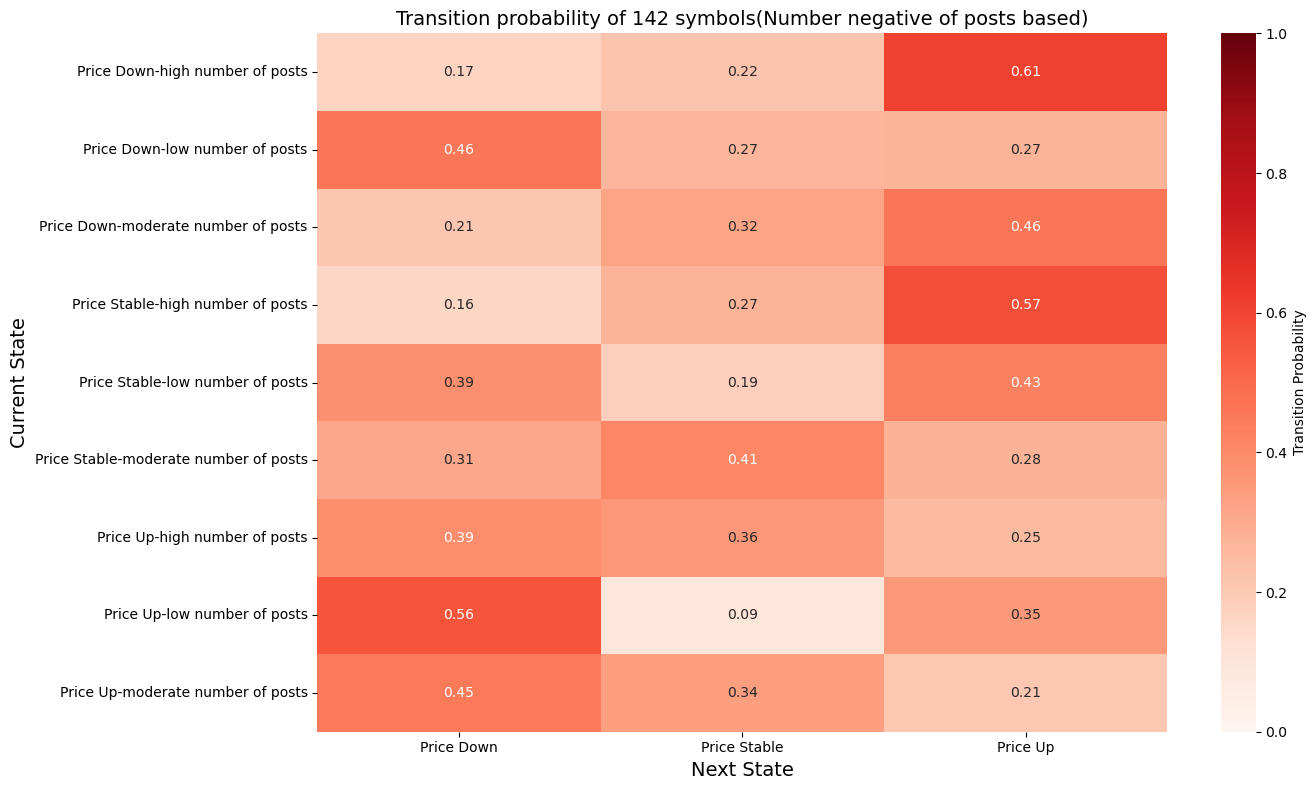

In [77]:
heatmap_illustration(markov_negative_posts_matrices_normalized, f"Transition probability of {len(optimized_negative_posts_symbols_list)} symbols(Number negative of posts based)", 'Next State', 'Current State')

Tương tự ở bảng này, có hai mục ta có thể khai thác bao gồm,

Dự đoán giá tăng:
- Giá hiện tại ổn đinh - Số lượng bài viết tiêu cực cao(62%)
- Giá hiện tại giảm - Số lượng bài viết tiêu cực cao(58%)

Dự đoán giá giảm:
- Giá hiện tại tăng - Số lượng bài viết tiêu cực thấp(56%)


In [78]:
print(f"Number of qualified symbols (positive posts): {len(optimized_positive_posts_symbols_list)}")
print("List of qualified symbols (positive posts):", optimized_positive_posts_symbols_list)


Number of qualified symbols (positive posts): 125
List of qualified symbols (positive posts): ['HPG', 'KBC', 'SZC', 'HAH', 'VIC', 'VGC', 'BVS', 'CTS', 'BCC', 'DGC', 'VN30F2M', 'BCM', 'DNW', 'DCL', 'MHC', 'DCM', 'SZL', 'VTB', 'VFG', 'CRC', 'QTP', 'SAS', 'DTK', 'VCP', 'ACG', 'SGT', 'TFC', 'AFX', 'NVB', 'NDN', 'ABI', 'BMI', 'TMT', 'APP', 'VC3', 'TNI', 'SNZ', 'ITD', 'VKC', 'CDN', 'PXL', 'GDT', 'PFL', 'DTL', 'HLD', 'ANT', 'H11', 'POS', 'TIS', 'PCF', 'TSB', 'LPT', 'VNA', 'PTC', 'SGN', 'BGE', 'BCE', 'L18', 'TMB', 'NSC', 'HDA', 'FUEVFVND', 'HSL', 'S99', 'SD9', 'BAX', 'SSG', 'CSC', 'HAP', 'PDC', 'GMH', 'DMC', 'TVD', 'PGB', 'GMC', 'PGC', 'PSI', 'CSI', 'HTM', 'TV4', 'GEE', 'TOS', 'PNC', 'TIN', 'SEA', 'VCF', 'DSP', 'DST', 'VPS', 'BMF', 'LIX', 'IVS', 'CAG', 'SFG', 'AAM', 'LAF', 'SKV', 'VNR', 'PAP', 'WCS', 'POT', 'L43', 'PBP', 'HAC', 'SD6', 'LBM', 'BRR', 'BWS', 'PVL', 'PTV', 'VTC', 'HNI', 'PTI', 'ITS', 'DAD', 'DQC', 'CMM', 'FUEDCMID', 'IST', 'BST', 'EBS', 'EID', 'RBC', 'FUEVN100', 'SBV']


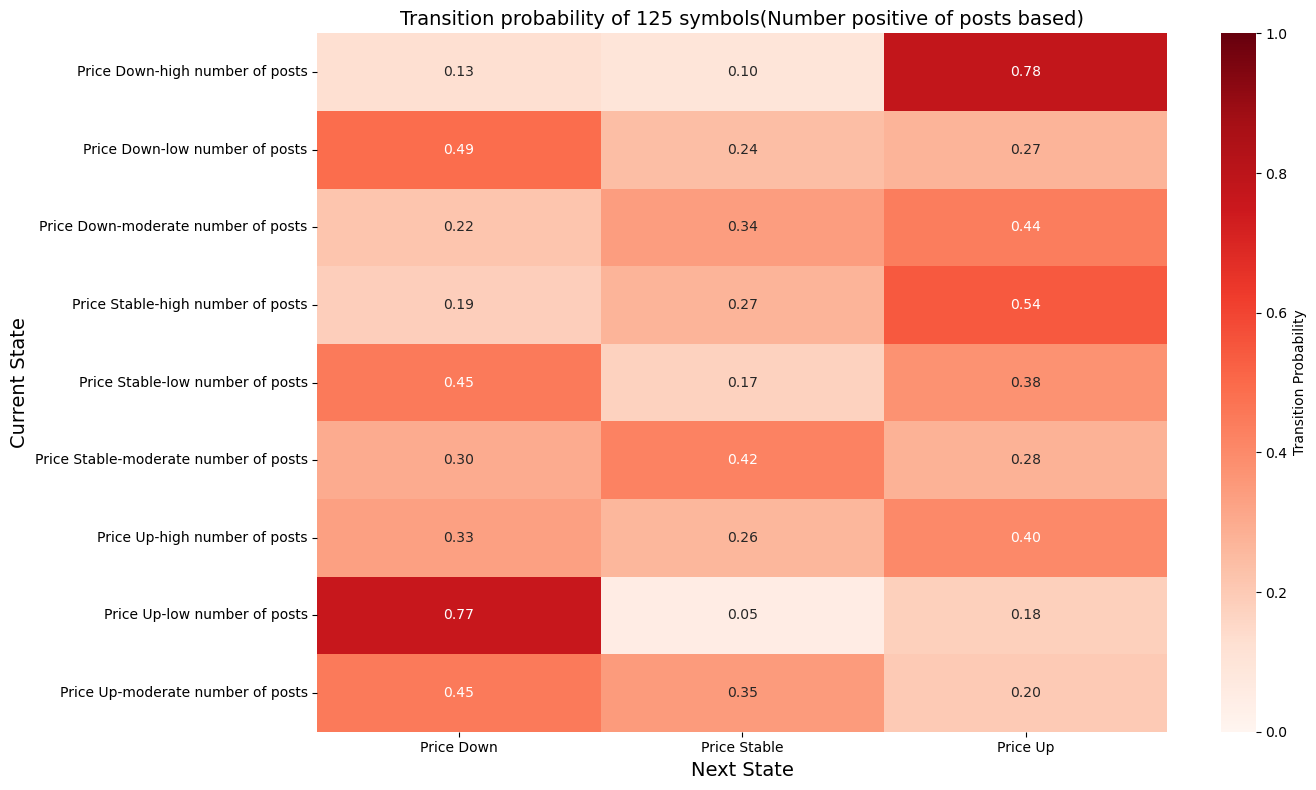

In [79]:
heatmap_illustration(markov_positive_posts_matrices_normalized, f"Transition probability of {len(optimized_positive_posts_symbols_list)} symbols(Number positive of posts based)", 'Next State', 'Current State')

Biểu đồ heatmap cho ma trận chuyển đổi dựa trên số lượng bài viết tích cực là biểu đồ có số mã chứng khoán thấp nhất với chỉ 80 mã phù hợp. Điều này xảy ra là do từ các dataframe mới, số lượng các bài viết tiêu cực vượt trội hơn hẳn so với số lượng các bài viết tích cực. 

Tuy vậy, vẫn đến 3 ô với dữ liệU chúng ta có thể khai thác(xác suất lớn hơn 50%) bao gồm,

Dự đoán giá tăng:
- Giá hiện tại giảm - Số bài đăng tích cực cao(78%)
- Giá hiện tại ổn định - Số bài viết tích cực cao(54%)

Dự đoán giá giảm:
- Giá hiện tại tăng - Số bài viết tích cực thấp(77%)


### Task 4: Sentiment analysis.

In [122]:
#top_users = user_activity.sort_values(by='number_of_posts', ascending=False).head(20)
top_users_list = top_users['userName'].tolist()
top_users_list

['gametaophoton',
 'THÍCH CHƠI XÍCH ĐU',
 'Helen Lan Anh',
 'Đạt Đặng Vĩnh',
 'tuhung246',
 'Lê Linh Trọng ( EIB VHM VNM GAS SAB )',
 '   ㅤㅤ  ㅤChênh Q9',
 'Đạt PT',
 'Gia Cát Lượng',
 'Quang Bui',
 'Tay Lái Lụa',
 'Tư Bản Mẽo',
 'Đpdp',
 'TRÂN VĂN TÍM',
 'Cá Sấu Săn Mồi🐊',
 'ISKRA',
 'Vũ Khánh Vlog',
 'Bien Sang',
 'Mãi Lên',
 'Hữu Nam']

In [146]:
user_data = new_posts_df[new_posts_df['username'] == 'gametaophoton']
user_data.head(2)


,postID,originalContent,time,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,date,price,symbol,word_count,hour
2941,29093563,Hoàn Hảo\n\nMạng Xã Hội ( tự do ngôn luận )\n\...,2024-11-06 13:39:46.360000+07:00,NaN,positive,1,0,NaN,"{'symb': '$BTC', 'price': 74820.0}",gametaophoton,0406662e-2ee3-49fe-8ce1-317a1aec3dc8,0,1,2024-11-06,74820.00,$BTC,55,13
3232,29092962,Putin chơi bitcoin chuyển tiền trả lương cho T...,2024-11-06 13:31:28.320000+07:00,NaN,negative,1,0,NaN,"{'symb': '$BTC', 'price': 74795.68}",gametaophoton,0406662e-2ee3-49fe-8ce1-317a1aec3dc8,0,1,2024-11-06,74795.68,$BTC,26,13


In [244]:
def next_price_and_time(symbol, time):
    # Check if the symbol exists in the valid_symbols list
    if symbol not in valid_symbols:
        return None, None
    
    # Floor the time to minutes and remove timezone
    time = time.floor('T').tz_localize(None)
    
    # Access the pre-loaded data for the symbol
    close_price = symbol_price_data_dict[symbol]
    
    # Find the next available time
    next_time = close_price.loc[close_price['time'] > time, 'time'].min()
    if pd.isna(next_time):
        return None, None
    
    # Fetch the next price directly
    next_price = close_price.loc[close_price['time'] == next_time, 'close'].iloc[0]
    return next_price, next_time

def calculate_sentiment_accuracy(symbol_name=None, user_name=None, next_price_and_time_func=None):
    # Validate inputs
    if (symbol_name is None and user_name is None) or (symbol_name is not None and user_name is not None):
        return None

    # Select the DataFrame based on the provided parameter
    if symbol_name:
        df = symbols_data_dict[symbol_name]
    else:  # user_name is not None
        df = new_posts_df[new_posts_df['username'] == user_name]

    # Apply the next_price_and_time function to calculate the next price and time
    df[['next_price', 'next_time']] = df[['symbol', 'time']].apply(
        lambda row: pd.Series(next_price_and_time_func(row['symbol'], row['time'])), axis=1
    )

    # Drop rows with missing next_price or next_time
    df = df.dropna(subset=['next_price', 'next_time'])

    # Map sentiment to numeric values
    sentiment_map = {'positive': 1, 'negative': -1}
    df['sentiment_numeric'] = df['sentiment'].map(sentiment_map)

    # Calculate the price change and categorize it
    df['price_change_category'] = ((df['next_price'] - df['price']) >= 0).astype(int).replace(0, -1)

    # Calculate sentiment accuracy
    df['sentiment_accuracy'] = (df['sentiment_numeric'] == df['price_change_category'])
    
    # Return the accuracy percentage
    return df['sentiment_accuracy'].mean()

##### Giải thích:
##### **1. Chức năng `next_price_and_time`**

Mục đích của hàm này là xác định giá đóng cửa (close price) tiếp theo và thời gian tương ứng cho một mã cổ phiếu cụ thể sau thời điểm được chỉ định.

- **Kiểm tra mã cổ phiếu hợp lệ**:
  - Hàm kiểm tra xem mã cổ phiếu (`symbol`) có nằm trong danh sách mã hợp lệ (`valid_symbols`) không. Nếu không, trả về giá trị `None, None`.
  
- **Chuẩn hóa thời gian**:
  - Thời gian đầu vào (`time`) được làm tròn đến phút gần nhất bằng phương pháp `floor('T')` và loại bỏ thông tin múi giờ (`tz_localize(None)`).

- **Truy xuất dữ liệu giá đóng cửa**:
  - Truy cập dữ liệu giá đóng cửa được lưu trước trong từ điển `symbol_price_data_dict` với khóa là mã cổ phiếu.

- **Tìm thời điểm tiếp theo**:
  - Sử dụng `loc` để lọc ra thời điểm tiếp theo lớn hơn thời điểm hiện tại. Thời điểm nhỏ nhất này được chọn làm `next_time`.
  - Nếu không có thời điểm phù hợp, trả về `None, None`.

- **Xác định giá tiếp theo**:
  - Dựa trên thời gian `next_time`, hàm tìm giá đóng cửa tiếp theo (`next_price`) và trả về cả hai giá trị `next_price` và `next_time`.

**Tóm lại**, hàm này hoạt động như một công cụ hỗ trợ để xác định giá trị tiếp theo của một cổ phiếu sau một thời điểm cụ thể.

---

##### **2. Chức năng `calculate_sentiment_accuracy`**

Hàm này tính toán độ chính xác của cảm xúc người dùng dựa trên sự thay đổi giá của cổ phiếu hoặc dữ liệu bài đăng.

- **Xác thực đầu vào**:
  - Nếu không có cả `symbol_name` và `user_name` hoặc cả hai cùng được cung cấp, hàm trả về `None` (lỗi logic).
  - Nếu chỉ cung cấp một trong hai tham số:
    - Nếu `symbol_name` được cung cấp: Truy xuất dữ liệu từ `symbols_data_dict` cho mã cổ phiếu tương ứng.
    - Nếu `user_name` được cung cấp: Lọc dữ liệu từ `new_posts_df` theo tên người dùng.

- **Tính toán giá và thời gian tiếp theo**:
  - Sử dụng hàm `next_price_and_time` để xác định `next_price` và `next_time` cho từng hàng dữ liệu. Kết quả được áp dụng với cột `symbol` và `time` thông qua `apply`.

- **Xử lý dữ liệu thiếu**:
  - Loại bỏ các hàng có giá trị bị thiếu trong các cột `next_price` hoặc `next_time`.

- **Gán giá trị số cho cảm xúc**:
  - Bản đồ cảm xúc (`sentiment`) thành các giá trị số: 
    - `"positive"` → `1`
    - `"negative"` → `-1`.

- **Tính toán và phân loại sự thay đổi giá**:
  - Sự thay đổi giá được xác định bằng hiệu giữa `next_price` và `price`:
    - Nếu thay đổi lớn hơn hoặc bằng 0: giá trị phân loại là `1`.
    - Nếu thay đổi nhỏ hơn 0: giá trị phân loại là `-1`.

- **Tính độ chính xác cảm xúc**:
  - Độ chính xác được xác định bằng cách so sánh cảm xúc số (`sentiment_numeric`) với phân loại thay đổi giá (`price_change_category`).

- **Trả về kết quả**:
  - Hàm trả về tỷ lệ chính xác trung bình của cảm xúc dưới dạng phần trăm.

---

##### **3. Tóm tắt**

- **Hàm `next_price_and_time`**:
  - Được thiết kế để xác định giá trị tiếp theo một cách nhanh chóng và chính xác dựa trên dữ liệu thời gian.
  - Các kiểm tra giá trị hợp lệ và xử lý lỗi (khi không có dữ liệu phù hợp) giúp cải thiện tính ổn định.

- **Hàm `calculate_sentiment_accuracy`**:
  - Tự động tính toán độ chính xác của cảm xúc dựa trên thay đổi giá, cung cấp một công cụ mạnh mẽ để phân tích dữ liệu cảm xúc và tài chính.
  - Kết hợp hiệu quả giữa thao tác dữ liệu và hàm áp dụng (`apply`) để xử lý khối lượng lớn dữ liệu.



In [245]:
#calculate_sentiment_accuracy('gametaophoton', next_price_and_time)

accuracies = []

for name in top_users_list:
    accuracy = calculate_sentiment_accuracy(user_name = name, next_price_and_time_func = next_price_and_time) * 100
    accuracies.append(accuracy if accuracy is not None else float('nan'))


top_users['sentiment_accuracy'] = accuracies    
top_users.head(5)

,userid,userName,number_of_posts,number_of_positive_posts,number_of_negative_posts,average_posts_len,total_likes,total_replies,sentiment_accuracy
357,0406662e-2ee3-49fe-8ce1-317a1aec3dc8,gametaophoton,1168,0,0,24.01,328,1255,52.099237
8109,5a1365a4-46fc-41d7-b021-45f7d02d639f,THÍCH CHƠI XÍCH ĐU,933,0,0,8.94,885,1067,50.429185
88,00cafff2-e845-4022-bafe-5113a8e7924d,Helen Lan Anh,865,489,339,9.19,579,1292,48.271889
5698,3f27c8b4-8c37-4d48-86b3-f2545cbfcadb,Đạt Đặng Vĩnh,704,3,0,6.39,312,647,51.063830
450,04ef8ca1-d34f-47f9-b7ca-5e7bec9df306,tuhung246,701,0,0,20.61,529,518,49.435028


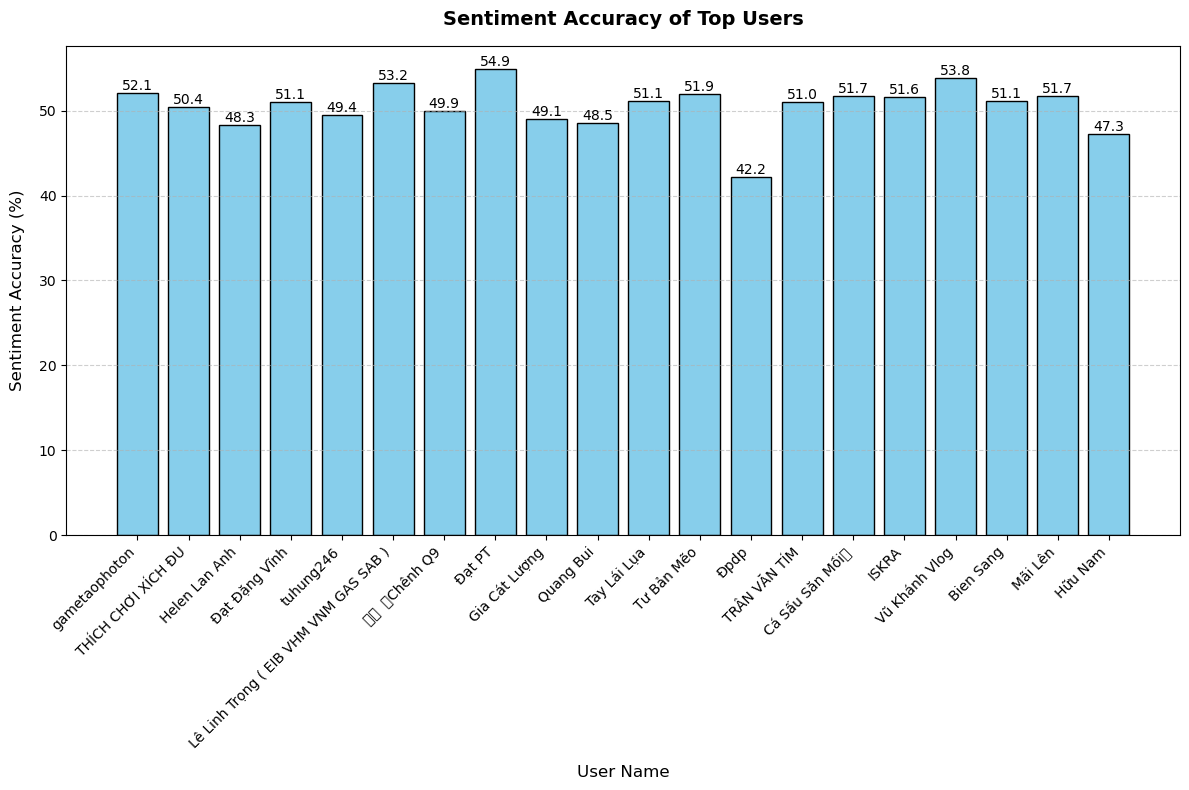

In [246]:
plt.figure(figsize=(12, 8))

# Vertical bar chart
bars = plt.bar(top_users['userName'], top_users['sentiment_accuracy'], color='skyblue', edgecolor='black')

# Add sentiment accuracy labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height + 0.01,                     # Y position (just above the bar)
        round(height, 1),                   # Format as a percentage
        ha='center', va='bottom', fontsize=10
    )

# Customize axes and title
plt.xlabel('User Name', fontsize=12, labelpad=10)
plt.ylabel('Sentiment Accuracy (%)', fontsize=12, labelpad=10)
plt.title('Sentiment Accuracy of Top Users', fontsize=14, fontweight='bold', pad=15)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
sentiment_accuracy_top_symbols = {}

for symbol in top_symbols:
    accuracy = calculate_sentiment_accuracy(symbol_name = symbol, next_price_and_time_func = next_price_and_time)
    sentiment_accuracy_top_symbols[symbol] = accuracy * 100
    
sentiment_accuracy_top_symbols
    

{'VNINDEX': 0.5510695283940786,
 'HPG': 0.6335511000976196,
 'VHM': 0.5133283816126104,
 'VN30F1M': 0.5168588399720475,
 'DXG': 0.5794235612349594,
 'DIG': 0.5606352261790183,
 'NVL': 0.5331776197048519,
 'PDR': 0.5804204204204204,
 'TPB': 0.6233178216576531,
 'SSI': 0.5817216533940084,
 'VN30': 0.5723762770333024,
 'HCM': 0.6184582268263151,
 'MBB': 0.6102456140350877,
 'MSN': 0.5642292490118577,
 'STB': 0.6861126920887877,
 'VIX': 0.5522582513028373,
 'HSG': 0.6462543686369853,
 'VND': 0.6059577095230746,
 '^DJI': 0.5218832891246684,
 'CTG': 0.5413124787487249}

In [284]:
sentiment_accuracy_top_symbols_df = pd.DataFrame(list(sentiment_accuracy_top_symbols.items()), columns=['symbol', 'sentiment_accuracy'])
sentiment_accuracy_top_symbols_df.head(2)


,symbol,sentiment_accuracy
0,VNINDEX,0.551070
1,HPG,0.633551


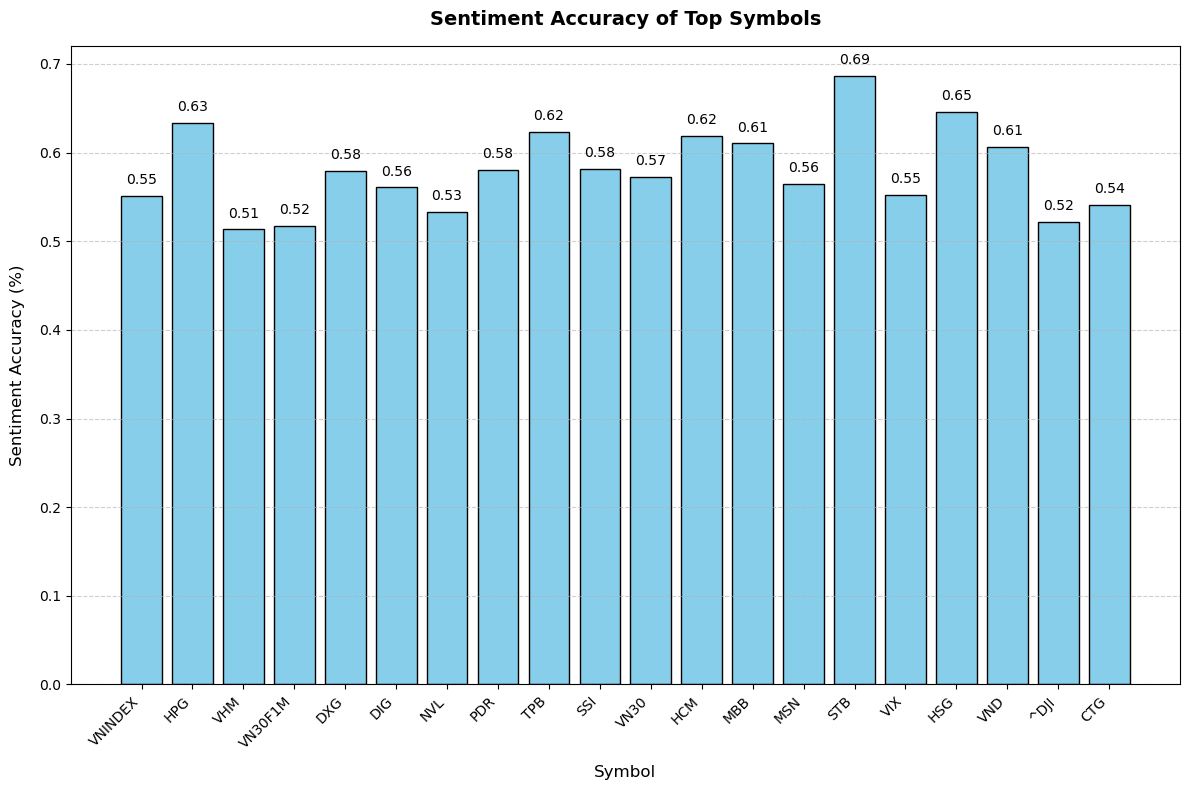

In [290]:
plt.figure(figsize=(12, 8))

# Vertical bar chart
bars = plt.bar(sentiment_accuracy_top_symbols_df['symbol'], sentiment_accuracy_top_symbols_df['sentiment_accuracy'], color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height + 0.01,                     # Y position (just above the bar)
        round(height, 2),                   # Format as a percentage
        ha='center', va='bottom', fontsize=10
    )

plt.xlabel('Symbol', fontsize=12, labelpad=10)
plt.ylabel('Sentiment Accuracy (%)', fontsize=12, labelpad=10)
plt.title('Sentiment Accuracy of Top Symbols', fontsize=14, fontweight='bold', pad=15)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
